### purpose

visualize the impact of adding nuisance envs to offset training of Gradient Forests. 

### outline

1. Read in the 225 seeds trained with temp and sal, and with either two (ISO-PSsd) or three (ISO-TSsd-PSsd) additional nuisance envs.
1. Read in 1- and 2-trait sims that were trained on temp and sal. 
    1. Keep only the same 225 seeds that were trained on the nuisance envs.
1. Read in the 6-trait sims trained with 6 adaptive envs
1. Read in the 6-trait sims trained with 6 adaptive envs + 3 nuis envs

1. Make figures, split by ntraits

In [1]:
from pythonimports import *
from myfigs import adjust_box_widths, create_cmap, save_pdf

import MVP_summary_functions as mvp

import seaborn as sns
import matplotlib
from matplotlib.lines import Line2D
import matplotlib.ticker as mticker
plt.rcParams.update({'font.family' : 'serif'})

# directories
outerdirs = {
    'ISO-PSsd' : '/home/b.lind/offsets/run_20220919_nuisance/ISO-PSsd_0-225',
    'ISO-TSsd-PSsd' : '/home/b.lind/offsets/run_20220919_nuisance/ISO-TSsd-PSsd_0-225'
}

summary_dir = '/work/lotterhos/MVP-Offsets/run_20220919/summaries'
figdir = makedir(f'{summary_dir}/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF')

t0 = dt.now()  # notebook timer

mvp.latest_commit()
session_info.show()

#########################################################
Today:	June 30, 2023 - 14:58:32 EDT
python version: 3.8.5
conda env: mvp_env

Current commit of pythonimports:
commit 9493334506a1f2926fba0734fa74ba2f87194611  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Fri Jun 30 09:41:00 2023 -0400

Current commit of MVP_offsets:
commit dcaf4a98ad33a59e3d371eed0bb26b1885505dcf  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Sat Jun 24 12:25:29 2023 -0400
#########################################################



# offset trained with extra nuisance envs

1- or 2-trait sims

In [2]:
# convert scores to dataframe, add some labels
summary = mvp.get_summary_data()  # read in all simulation metadata

scores = []
for nuis_envs, outerdir in outerdirs.items():
    # load the scores
    level_scores = pklload(f'{outerdir}/summaries/all_performance_dicts/level_scores.pkl')

    # get the good info
    df = level_scores['GF']['garden_performance']

    # do some things that mvp.combine_level_dicts does
    df['rep'] = '0-225'  # add rep ID - this was only reps that were done
    for col in ['final_LA', 'cor_TPR_temp', 'cor_TPR_sal', 'cor_FPR_temp_neutSNPs', 'cor_FPR_sal_neutSNPs']:  # get other info
        df[col] = df.seed.map(summary[col])

    # name the nuis envs
    df['nuis_envs'] = nuis_envs
    
    # append sal to 1-trait sims
    df.loc[df.plevel == '1-trait', 'nuis_envs'] = 'sal-' + df.loc[df.plevel == '1-trait', 'nuis_envs']

    scores.append(df)
    
nuis_scores = pd.concat(scores)

nuis_scores['nuis_envs'] = nuis_scores['nuis_envs'].map(mvp.nuis_dict)

nuis_scores['program'] = "GF"

nuis_scores

garden     score            glevel   plevel          pleio  \
1231094       1 -0.891313  highly-polygenic  1-trait  no pleiotropy   
1231094       2 -0.890505  highly-polygenic  1-trait  no pleiotropy   
1231094       3 -0.893333  highly-polygenic  1-trait  no pleiotropy   
1231094       4 -0.900202  highly-polygenic  1-trait  no pleiotropy   
1231094       5 -0.896566  highly-polygenic  1-trait  no pleiotropy   
...         ...       ...               ...      ...            ...   
1231318      96 -0.349732        oligogenic  2-trait     pleiotropy   
1231318      97 -0.159006        oligogenic  2-trait     pleiotropy   
1231318      98 -0.261643        oligogenic  2-trait     pleiotropy   
1231318      99 -0.420042        oligogenic  2-trait     pleiotropy   
1231318     100 -0.373573        oligogenic  2-trait     pleiotropy   

            slevel   landscape                 popsize   migration marker_set  \
1231094        NaN  Est-Clines  N-cline-center-to-edge  m-constant   adaptive   
1231094        NaN  Est-Clines  N-cline-center-to-edge  m-constant   adaptive   
1231094        NaN  Est-Clines  N-cline-center-to-edge  m-constant   adaptive   
1231094        NaN  Est-Clines  N-cline-center-to-edge  m-constant   adaptive   
1231094        NaN  Est-Clines  N-cline-center-to-edge  m-constant   adaptive   
...            ...         ...                     ...         ...        ...   
1231318  unequal-S      SS-Mtn              N-variable  m-variable    neutral   
1231318  unequal-S      SS-Mtn              N-variable  m-variable    neutral   
1231318  unequal-S      SS-Mtn              N-variable  m-variable    neutral   
1231318  unequal-S      SS-Mtn              N-variable  m-variable    neutral   
1231318  unequal-S      SS-Mtn              N-variable  m-variable    neutral   

            seed                                   simulation_level  \
1231094  1231094  highly-polygenic_1-trait_no-pleiotropy_nan_Est...   
1231094  1231094  highly-polygenic_1-trait_no-pleiotropy_nan_Est...   
1231094  1231094  highly-polygenic_1-trait_no-pleiotropy_nan_Est...   
1231094  1231094  highly-polygenic_1-trait_no-pleiotropy_nan_Est...   
1231094  1231094  highly-polygenic_1-trait_no-pleiotropy_nan_Est...   
...          ...                                                ...   
1231318  1231318  oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...   
1231318  1231318  oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...   
1231318  1231318  oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...   
1231318  1231318  oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...   
1231318  1231318  oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...   

         noncausal_env                                       offset_level  \
1231094  one noncausal  highly-polygenic_1-trait_no-pleiotropy_nan_Est...   
1231094  one noncausal  highly-polygenic_1-trait_no-pleiotropy_nan_Est...   
1231094  one noncausal  highly-polygenic_1-trait_no-pleiotropy_nan_Est...   
1231094  one noncausal  highly-polygenic_1-trait_no-pleiotropy_nan_Est...   
1231094  one noncausal  highly-polygenic_1-trait_no-pleiotropy_nan_Est...   
...                ...                                                ...   
1231318     all causal  oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...   
1231318     all causal  oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...   
1231318     all causal  oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...   
1231318     all causal  oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...   
1231318     all causal  oligogenic_2-trait_pleiotropy_unequal-S_SS-Mtn...   

           rep  final_LA  cor_TPR_temp  cor_TPR_sal  cor_FPR_temp_neutSNPs  \
1231094  0-225  0.500854       0.46129          NaN               0.521256   
1231094  0-225  0.500854       0.46129          NaN               0.521256   
1231094  0-225  0.500854       0.46129          NaN               0.521256   
1231094  0-225  0.500854       0.46129          NaN               0.521256   
1231094  0-225 

In [3]:
nuis_scores.rep.value_counts()

0-225    135000
Name: rep, dtype: int64

In [4]:
nuis_scores.nuis_envs.value_counts()

2-trait 4-envs    54000
2-trait 5-envs    54000
1-trait 4-envs    13500
1-trait 5-envs    13500
Name: nuis_envs, dtype: int64

# offset trained with temp and sal only

In [5]:
# read in all trained data across programs (reduce next) - keep only GF
reg_scores = mvp.combine_level_dicts(
    use_bcs_data=False,
    repdirs = ['/work/lotterhos/MVP-Offsets/run_20220919_0-225']
)['GF']  # note ['GF'] key is used but print-outs are default

reg_scores

filtering criteria:
	use_bcs_data = False
	performance = garden_performance
	num_traits = None
	ntraits = None
	marker_set = None
	remove_structcrxn = False
	keep_nuisance = True
	remove_rda_outliers = True


reading reps: 100%|███████████████| 1/1 [00:01<00:00,  1.85s/it]


0-225
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225



 RONA df.shape = (135000, 16) num_seeds = 225 num_reps = 1

 lfmm2 df.shape = (81000, 17) num_seeds = 225 num_reps = 1

 GF df.shape = (81000, 16) num_seeds = 225 num_reps = 1

 rda df.shape = (162000, 18) num_seeds = 225 num_reps = 1
Function `combine_level_dicts` completed after : 0-00:00:03


garden     score            glevel   plevel          pleio slevel  \
1231094       1 -0.906263  highly-polygenic  1-trait  no pleiotropy    NaN   
1231094       2 -0.906263  highly-polygenic  1-trait  no pleiotropy    NaN   
1231094       3 -0.903030  highly-polygenic  1-trait  no pleiotropy    NaN   
1231094       4 -0.901414  highly-polygenic  1-trait  no pleiotropy    NaN   
1231094       5 -0.893333  highly-polygenic  1-trait  no pleiotropy    NaN   
...         ...       ...               ...      ...            ...    ...   
1231258      96 -0.943292        oligogenic  1-trait  no pleiotropy    NaN   
1231258      97 -0.943292        oligogenic  1-trait  no pleiotropy    NaN   
1231258      98 -0.943292        oligogenic  1-trait  no pleiotropy    NaN   
1231258      99 -0.943292        oligogenic  1-trait  no pleiotropy    NaN   
1231258     100 -0.943292        oligogenic  1-trait  no pleiotropy    NaN   

          landscape                 popsize   migration marker_set     seed  \
1231094  Est-Clines  N-cline-center-to-edge  m-constant   adaptive  1231094   
1231094  Est-Clines  N-cline-center-to-edge  m-constant   adaptive  1231094   
1231094  Est-Clines  N-cline-center-to-edge  m-constant   adaptive  1231094   
1231094  Est-Clines  N-cline-center-to-edge  m-constant   adaptive  1231094   
1231094  Est-Clines  N-cline-center-to-edge  m-constant   adaptive  1231094   
...             ...                     ...         ...        ...      ...   
1231258      SS-Mtn              N-variable  m-variable    neutral  1231258   
1231258      SS-Mtn              N-variable  m-variable    neutral  1231258   
1231258      SS-Mtn              N-variable  m-variable    neutral  1231258   
1231258      SS-Mtn              N-variable  m-variable    neutral  1231258   
1231258      SS-Mtn              N-variable  m-variable    neutral  1231258   

                                          simulation_level   noncausal_env  \
1231094  highly-polygenic_1-trait_no-pleiotropy_nan_Est...  1-trait 2-envs   
1231094  highly-polygenic_1-trait_no-pleiotropy_nan_Est...  1-trait 2-envs   
1231094  highly-polygenic_1-trait_no-pleiotropy_nan_Est...  1-trait 2-envs   
1231094  highly-polygenic_1-trait_no-pleiotropy_nan_Est...  1-trait 2-envs   
1231094  highly-polygenic_1-trait_no-pleiotropy_nan_Est...  1-trait 2-envs   
...                                                    ...             ...   
1231258  oligogenic_1-trait_no-pleiotropy_nan_SS-Mtn_N-...   1-trait 1-env   
1231258  oligogenic_1-trait_no-pleiotropy_nan_SS-Mtn_N-...   1-trait 1-env   
1231258  oligogenic_1-trait_no-pleiotropy_nan_SS-Mtn_N-...   1-trait 1-env   
1231258  oligogenic_1-trait_no-pleiotropy_nan_SS-Mtn_N-...   1-trait 1-env   
1231258  oligogenic_1-trait_no-pleiotropy_nan_SS-Mtn_N-...   1-trait 1-env   

                                              offset_level program    rep  \
1231094  highly-polygenic_1-trait_no-pleiotropy_nan_Est...      GF  0-225   
1231094  highly-polygenic_1-trait_no-pleiotropy_nan_Est...      GF  0-225   
1231094  highly-polygenic_1-trait_no-pleiotropy_nan_Est...      GF  0-225   
1231094  highly-polygenic_1-trait_no-pleiotropy_nan_Est...      GF  0-225   
1231094  highly-polygenic_1-trait_no-pleiotropy_nan_Est...      GF  0-225   
...                                                    ...     ...    ...   
1231258  oligogenic_1-trait_no-pleiotropy_nan_SS-Mtn_N-...      GF  0-225   
1231258  oligogenic_1-trait_no-pleiotropy_nan_SS-Mtn_N-...      GF  0-225   
1231258  oligogenic_1-trait_no-pleiotropy_nan_SS-Mtn_N-...      GF  0-225   
1231258  oligogenic_1-trait_no-pleiotropy_nan_SS-Mtn_N-...      GF  0-225   
1231258  oligogenic_1-trait_no-pleiotropy_nan_SS-Mtn_N-...      GF  0-225   

                                         simulation_garden  final_LA  \
1231094  highly-polygenic_1-trait_no-pleiotropy_nan_Est...  0.500854   
1231094  highly-polygenic_1-trait_no-pleiotropy_nan_Est...  0.500854   
1231094  highly-polygenic_1-trait_no-pleiotro

In [6]:
reg_scores.noncausal_env.map(mvp.factor_names).unique()

array(['1-trait 1-nuisance', '2-trait 0-nuisance', '1-trait 0-nuisance'],
      dtype=object)

In [7]:
reg_scores.noncausal_env.isnull().sum()

0

In [8]:
reg_scores.rep.value_counts()

0-225    81000
Name: rep, dtype: int64

In [9]:
# add nuis_envs column
reg_scores['nuis_envs'] = reg_scores.noncausal_env

reg_scores.shape

(81000, 25)

In [10]:
reg_scores.rep.value_counts()

0-225    81000
Name: rep, dtype: int64

In [11]:
reg_scores.nuis_envs.map(mvp.factor_names).value_counts()

2-trait 0-nuisance    54000
1-trait 1-nuisance    13500
1-trait 0-nuisance    13500
Name: nuis_envs, dtype: int64

In [12]:
reg_scores.program.unique()

array(['GF'], dtype=object)

# combine canonical offsets with nuisance offsets

In [13]:
all_scores = pd.concat([reg_scores, nuis_scores])

all_scores.rep.value_counts()

0-225    216000
Name: rep, dtype: int64

In [14]:
all_scores.nuis_envs.map(mvp.factor_names).value_counts()

2-trait 0-nuisance    54000
2-trait 2-nuisance    54000
2-trait 3-nuisance    54000
1-trait 1-nuisance    13500
1-trait 0-nuisance    13500
1-trait 3-nuisance    13500
1-trait 4-nuisance    13500
Name: nuis_envs, dtype: int64

# mutlivariate sims without nuisance envs

# multivariate sims with nuisance envs

# visualize

### separate by simulation parameters

1-trait
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/1-trait_nuisance-level_by_landscape.pdf


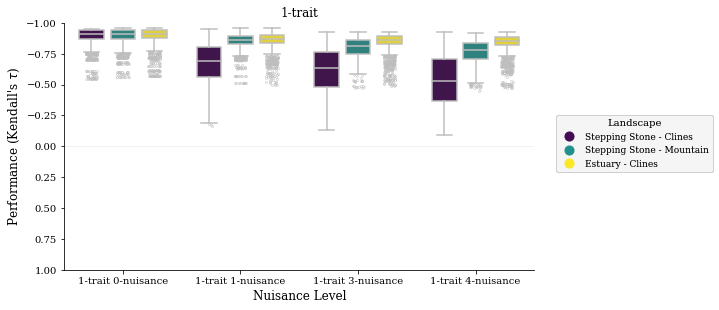

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/1-trait_nuisance-level_by_glevel.pdf


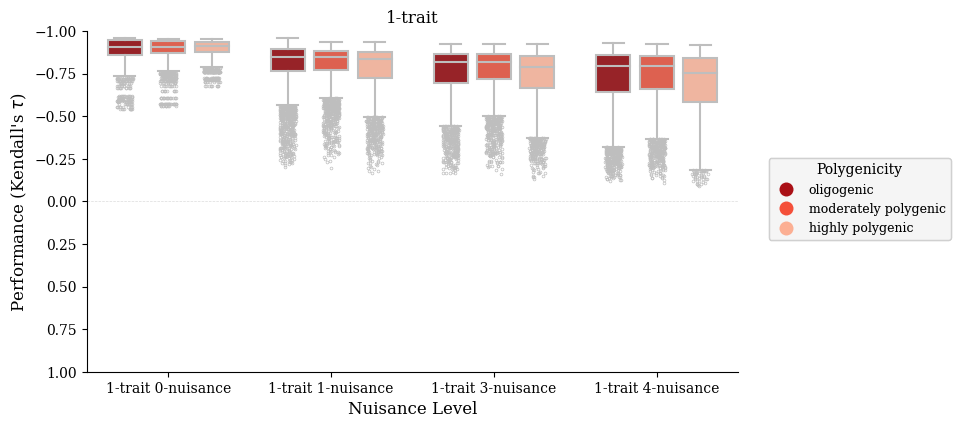

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/1-trait_nuisance-level_by_popsize.pdf


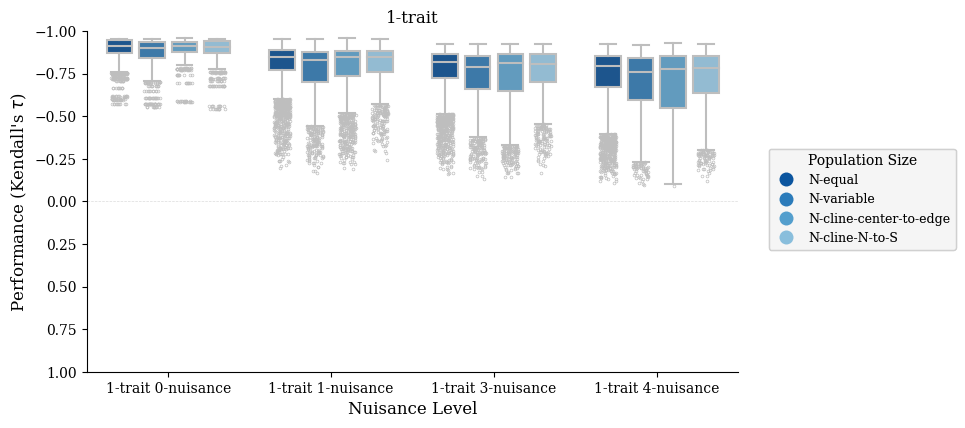

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/1-trait_nuisance-level_by_migration.pdf


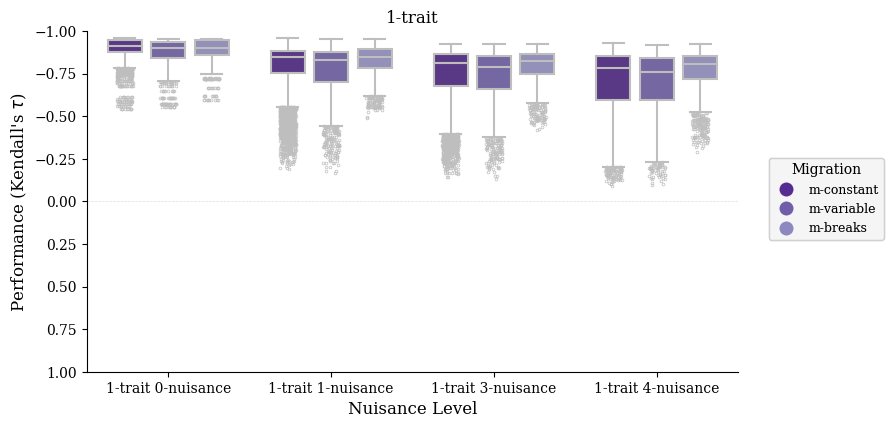

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/1-trait_nuisance-level_by_marker_set.pdf


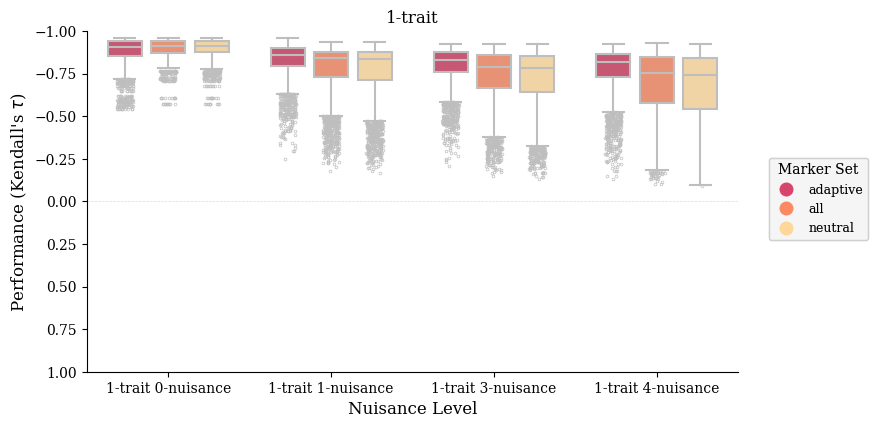

2-trait
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/2-trait_nuisance-level_by_landscape.pdf


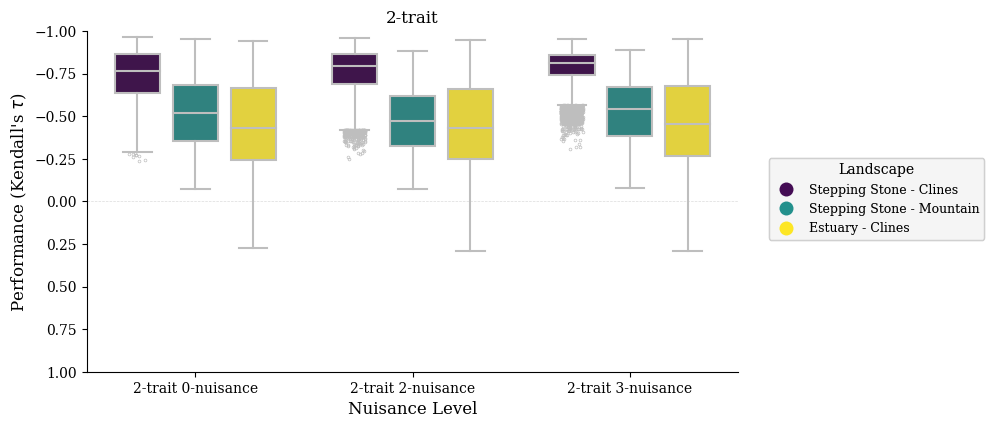

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/2-trait_nuisance-level_by_glevel.pdf


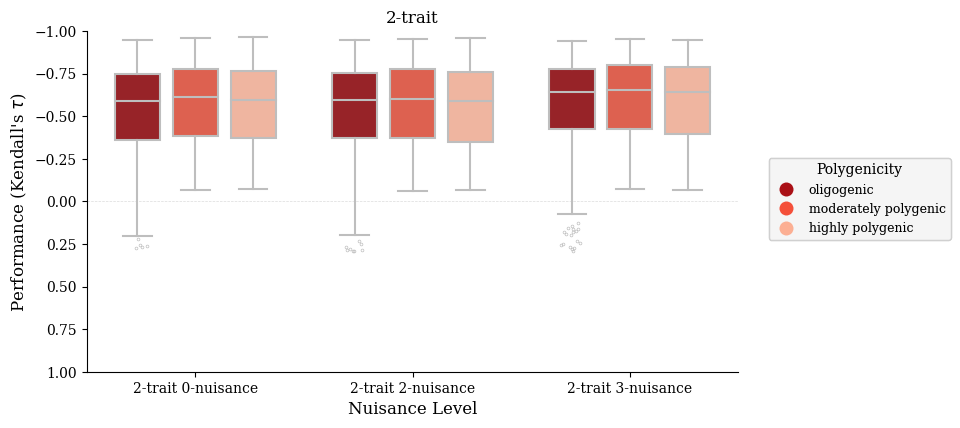

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/2-trait_nuisance-level_by_pleio.pdf


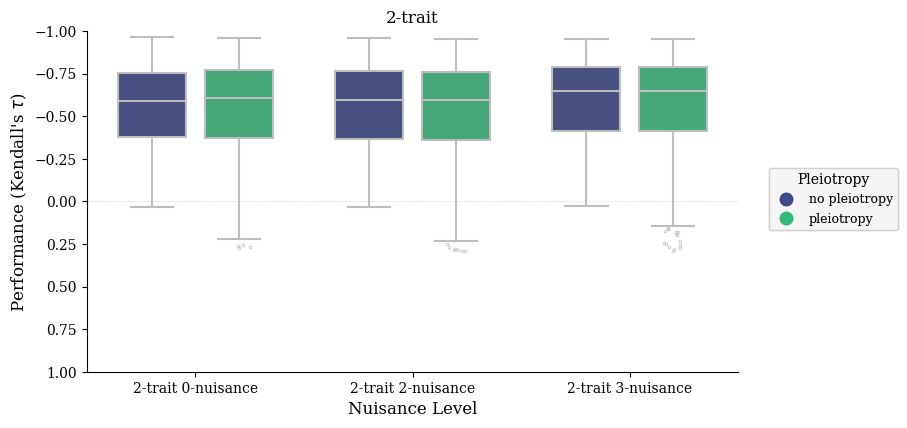

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/2-trait_nuisance-level_by_slevel.pdf


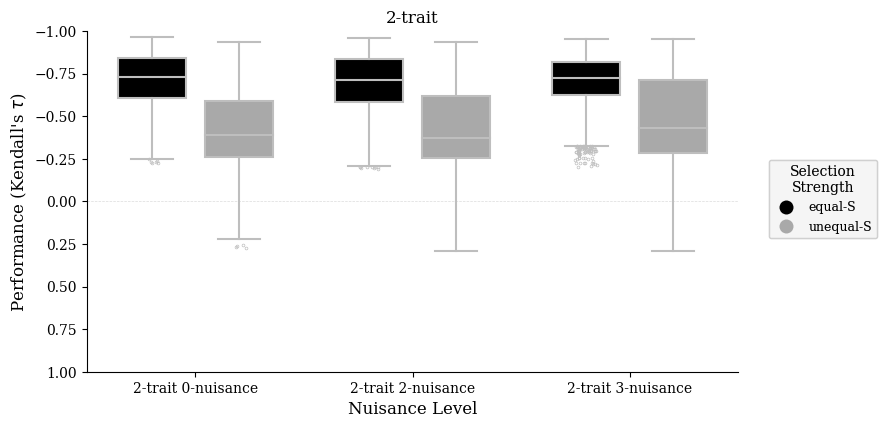

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/2-trait_nuisance-level_by_popsize.pdf


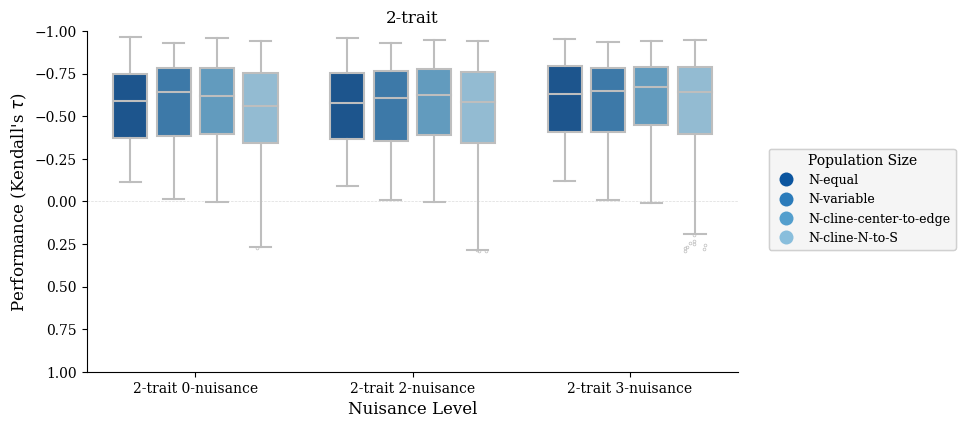

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/2-trait_nuisance-level_by_migration.pdf


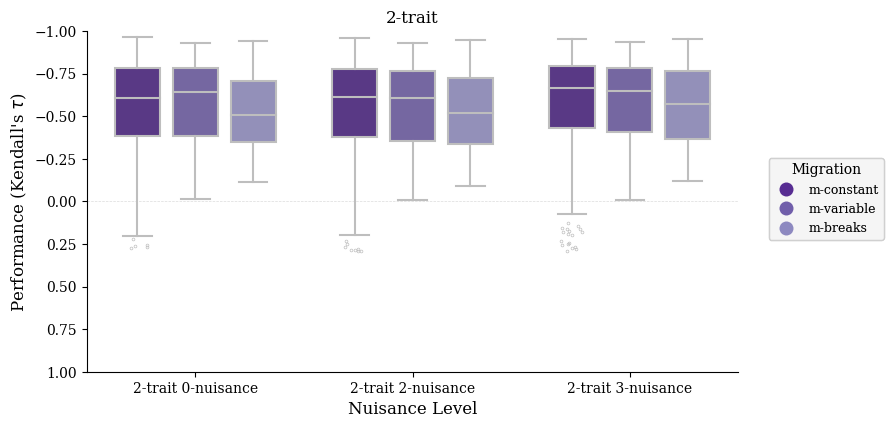

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/2-trait_nuisance-level_by_marker_set.pdf


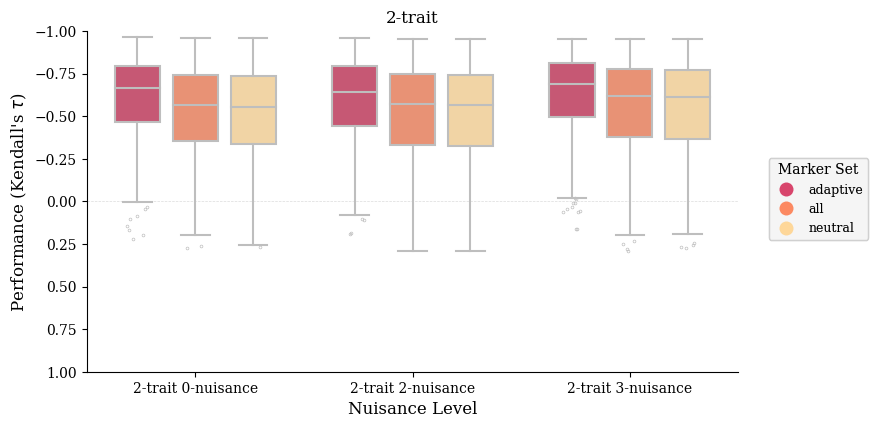

In [15]:
for ntraits in ['1-trait', '2-trait']:
    print(ColorText(ntraits).bold())
    
    df = all_scores[all_scores.plevel == ntraits].copy()
    
    order = sorted(df.nuis_envs.unique())
    
    for hue, hue_order in mvp.hue_order.items():
        if hue in ['program', 'noncausal_env']:
            continue
        if hue in ['slevel', 'pleio'] and ntraits == '1-trait':
            continue
            
        g = sns.catplot(data=df,
                        x='nuis_envs',
                        y='score',
                        order=order,
                        hue=hue,
                        hue_order=hue_order,
                        legend=False,
                        kind='box',
                        **mvp.boxplot_kwargs,
                   )
        
        g.figure.set_size_inches((8, 4))
        
        g.set(ylim=(1, -1),
              title=ntraits)
        adjust_box_widths(list(g.axes[0]), 0.8)
        mvp.jitter_fliers(g)
        
        g.set_axis_labels('Nuisance Level', "Performance (Kendall's $\\tau$)", fontsize=12)

        mvp.add_legend(g.figure, color_by=hue, loc='center left', bbox_to_anchor=(1, 0.55), fontsize=9)
        
        for ax in g.axes[0]:
            ax.axhline(0, linestyle='--', color='gainsboro', linewidth=0.5, zorder=0)
            mvp.update_ticklabels(ax)

        save_pdf(f'{figdir}/{ntraits}_nuisance-level_by_{hue}.pdf')
            
        plt.show()
        

### separate by trait and nuisance envs

In [16]:
def cleanup_fig(g, xlabel="Landscape", fontsize=12, ntraits=None):
    """Make the fig look rull pretty."""
    adjust_box_widths(list(g.axes[0]), 0.85)
    g.figure.set_size_inches((8, 4))
    g.set(ylim=(0.65, -1),
          yticks=mvp.ytick_labels,
          yticklabels=mvp.ytick_labels)
    g.set_axis_labels(xlabel, "Performance (Kendall's $\\tau$)", fontsize=fontsize)

    mvp.jitter_fliers(g)
    g.tight_layout()
    
    # line at tau = 0
    for ax in g.axes[0]:
        ax.axhline(0, linestyle='--', color='gainsboro', linewidth=0.5, zorder=0)
    
    mvp.add_legend(g.figure, color_by=ntraits, loc='center left', bbox_to_anchor=(1, 0.55), fontsize=9)
    
    pass
    

In [17]:
# sanity check that all counts are equal for each boxplot below
for ntraits in ['1-trait', '2-trait']:
    for landscape in all_scores.landscape.unique():
        t1 = all_scores[all_scores.plevel == ntraits].copy()
        t2 = t1[t1.landscape==landscape]
        assert len(t2.nuis_envs.value_counts().unique()) == 1, t2.nuis_envs.value_counts().unique()
        
t2.nuis_envs.value_counts()  # example without .unique() - unique number of counts

2-trait 2-envs    18000
2-trait 4-envs    18000
2-trait 5-envs    18000
Name: nuis_envs, dtype: int64

In [18]:
for nuis_envs in sorted(all_scores.nuis_envs.unique()):
    color = mvp.boxplot_kwargs['palette'][nuis_envs]
    print(ColorText(mvp.factor_names[nuis_envs]).custom(color).bold(), color)

1-trait 0-nuisance #bce4b5
1-trait 1-nuisance #56b567
1-trait 3-nuisance #2c944c
1-trait 4-nuisance #05712f
2-trait 0-nuisance #04652a
2-trait 2-nuisance #034b1f
2-trait 3-nuisance #023215


Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_1-trait_landscape_by_nuisance-level.pdf


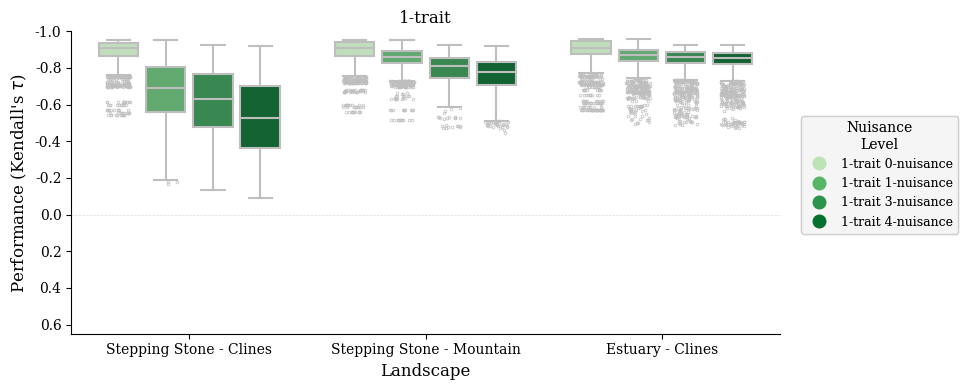

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_landscape_by_nuisance-level.pdf


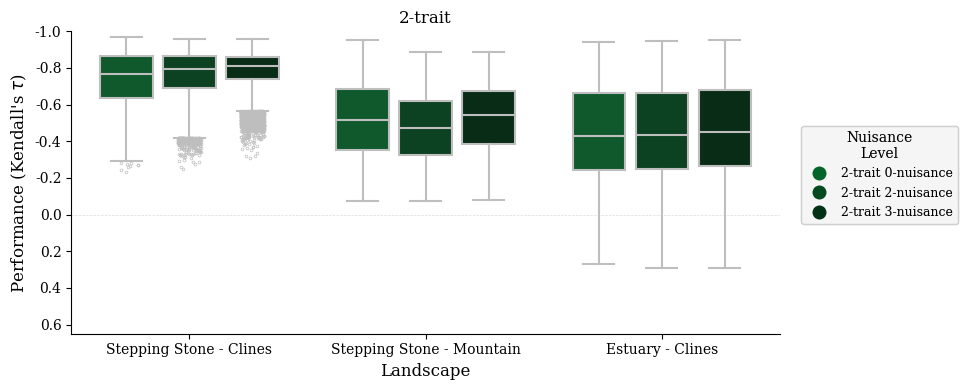

In [19]:
for ntraits in ['1-trait', '2-trait']:
    data = all_scores[all_scores.plevel == ntraits]
    
    g = sns.catplot(
        data=data,
        x='landscape',
        y='score',
        order=mvp.hue_order['landscape'],
        hue='nuis_envs',
        hue_order=sorted(data.nuis_envs.unique()),
        kind='box',
        legend=False,
        **mvp.boxplot_kwargs
    )

    g.ax.set_ylim((1, -1))

    g.set(title=ntraits)
    
    mvp.update_ticklabels(g.ax)
    
    cleanup_fig(g, xlabel='Landscape', ntraits=ntraits)
    
    save_pdf(f'{figdir}/GF_{ntraits}_landscape_by_nuisance-level.pdf')
    
    plt.show()

### is there differences for slevel? A: yes

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_landscape_by_nuisance-level_by_slevel.pdf


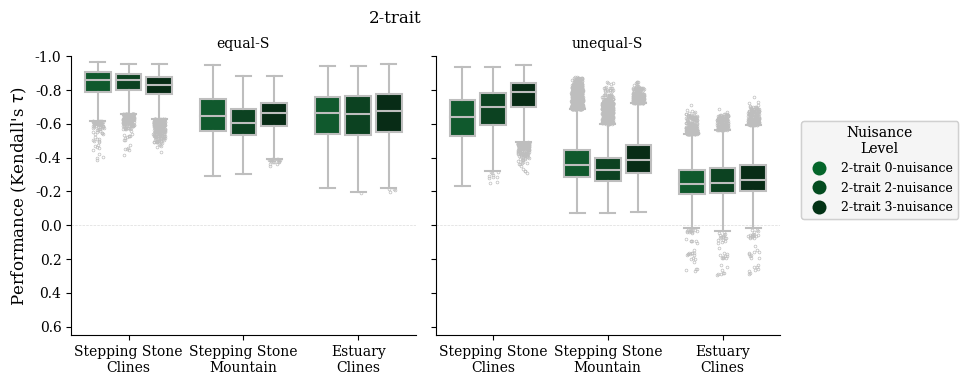

In [20]:
data = all_scores[all_scores.plevel == '2-trait']

g = sns.catplot(
    data=data,
    x='landscape',
    y='score',
    order=mvp.hue_order['landscape'],
    hue='nuis_envs',
    hue_order=sorted(data.nuis_envs.unique()),
    col='slevel',
    col_order=mvp.hue_order['slevel'],
    kind='box',
    legend=False,
    **mvp.boxplot_kwargs
)

for i, ax in enumerate(g.axes[0]):
    ax.set_ylim((1, -1))
    ax.set_ylabel(ax.get_ylabel(), fontsize=10)
    mvp.update_ticklabels(ax, replace=(' - ', '\n'), fontsize=10)

g.set_titles("{col_name}", size=10)
g.figure.suptitle('2-trait', y=0.95)
g.figure.set_size_inches((8, 4))

cleanup_fig(g, xlabel='', ntraits='2-trait')

save_pdf(f'{figdir}/GF_{ntraits}_landscape_by_nuisance-level_by_slevel.pdf')

### separate by trait only

# 1-trait

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_1-trait_nuisance-level_performance.pdf


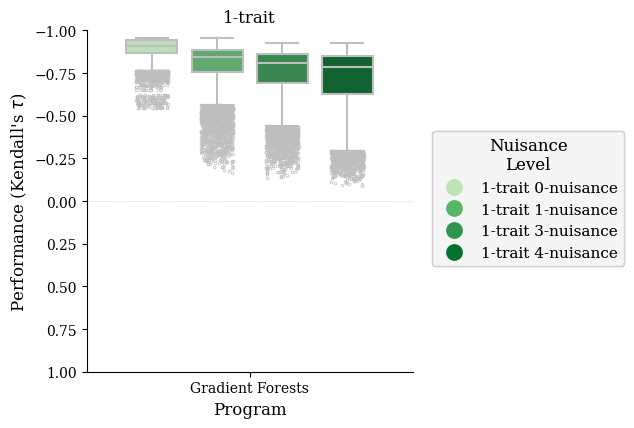

# 2-trait

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_nuisance-level_performance.pdf


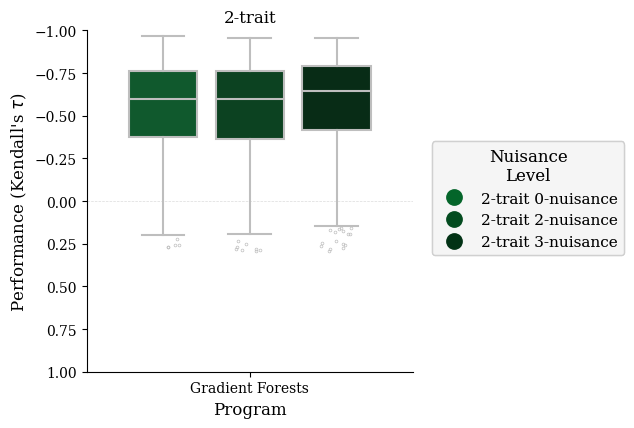

In [21]:
# plot nuis envs across all levels, separate by ntraits
for ntraits in ['1-trait', '2-trait']:
    printmd(f'# {ntraits}')
    
    df = all_scores[all_scores.plevel == ntraits].copy()

    nuis_order = sorted(df.nuis_envs.unique())
    
    g = sns.catplot(data=all_scores,
                    x='program',
                    y='score',
                    order=['GF'],
                    hue='nuis_envs',
                    hue_order=nuis_order,
                    **mvp.boxplot_kwargs,
                    legend=False,
                    kind='box',
               )

    g.set(ylim=(1, -1),
          title=ntraits)
    adjust_box_widths(list(g.axes[0]), 0.8)
    mvp.jitter_fliers(g)

    for ax in g.axes[0]:
        ax.axhline(0, linestyle='--', color='gainsboro', linewidth=0.5, zorder=0)
        mvp.update_ticklabels(ax)
        

    g.figure.set_size_inches((4, 4))
    
    legend = mvp.add_legend(g.figure, color_by=ntraits, loc='center left', bbox_to_anchor=(1, 0.55))
    
    g.set_axis_labels('Program', "Performance (Kendall's $\\tau$)", fontsize=12)
    
    save_pdf(f'{figdir}/GF_{ntraits}_nuisance-level_performance.pdf')
    
    plt.show()

plt.show()

# compare nuis to non-nuisance runs

color by marker set, separate by landscape

In [22]:
# marker set is same order so I can have one color list for plotting
assert all(
    all_scores[all_scores.nuis_envs == '2-trait 2-envs'].marker_set == \
    all_scores[all_scores.nuis_envs == '2-trait 4-envs'].marker_set
)

In [23]:
# marker set is same order so I can have one color list for plotting
assert all(
    all_scores[all_scores.nuis_envs == '2-trait 2-envs'].marker_set == \
    all_scores[all_scores.nuis_envs == '2-trait 5-envs'].marker_set
)

In [24]:
def plot_scatter(ntraits, color_by='marker_set', loc='upper center', bbox_to_anchor=None, ncol=1):
    """Make the figure I want. :)
    
    Parameters
    ----------
    ntraits : str
        of the set {'1-trait', '2-trait'}; determines what data to plot
    color_by : str
        key to mvp.hue_order; used to determine how scatter points are colored from mvp.boxplot_kwargs['palette']
    loc : str
        location of legend
    bbox_to_anchor : tuple
        fine placement of legend relative to `loc`
    ncol : [int, 'auto']
        the number of columns in the legend
    """
    
    if ntraits == '1-trait':
        x_level = '1-trait 1-env'
        y_levels = ['1-trait 2-envs', '1-trait 4-envs', '1-trait 5-envs']
        figsize = (12, 4)
        fontsize = 11
        program_y = 0.9
        
    else:
        x_level = '2-trait 2-envs'
        y_levels = ['2-trait 4-envs', '2-trait 5-envs']
        figsize = (6.7, 3.35)
        fontsize = 8
        program_y = 0.89
    
    for landscape in mvp.hue_order['landscape']:
        data = all_scores[all_scores.landscape == landscape].copy()

        fig, axes = plt.subplots(nrows=1, ncols=len(y_levels), figsize=figsize)

        for level, ax in zip(y_levels, axes):
            ax.scatter(
                data[data.nuis_envs == x_level]['score'],
                data[data.nuis_envs == level]['score'],
                c=data[data.nuis_envs == x_level][color_by].map(mvp.boxplot_kwargs['palette']),
                s=1
            )
            ax.set_xlabel(f"{mvp.factor_names[x_level]} performance\n(Kendall's $\\tau$)")
            ax.set_ylabel(f"{mvp.factor_names[level]} performance\n(Kendall's $\\tau$)")

            lims = [
                np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
                np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
            ]

            lims = [-1, 0.4]

            # now plot both limits against eachother
            ax.plot(lims, lims, 'k-', alpha=0.75, zorder=5)

            ax.set_xlim(lims)
            ax.set_ylim(lims)

            ax.invert_xaxis()
            ax.invert_yaxis()

            ax.axhline(0, linestyle='--', color='gainsboro', linewidth=0.5, zorder=0)
            ax.axvline(0, linestyle='--', color='gainsboro', linewidth=0.5, zorder=0)

        fig.suptitle(mvp.factor_names[landscape],
                     color=mvp.boxplot_kwargs['palette'][landscape],
                     weight='bold')

        fig.tight_layout()
        
        if landscape == 'SS-Clines':
            mvp.add_legend(fig, fontsize=fontsize, color_by=color_by, loc=loc, ncol=ncol,
                           bbox_to_anchor=bbox_to_anchor)
            fig.text(0.5, program_y, 'Gradient Forests', weight='bold', ha='center')
        
        save_pdf(f'{figdir}/GF_{ntraits}_true_vs_nuisance_scatter_by_{color_by}_{landscape}.pdf')

        plt.show()
        
    pass

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_1-trait_true_vs_nuisance_scatter_by_glevel_SS-Clines.pdf


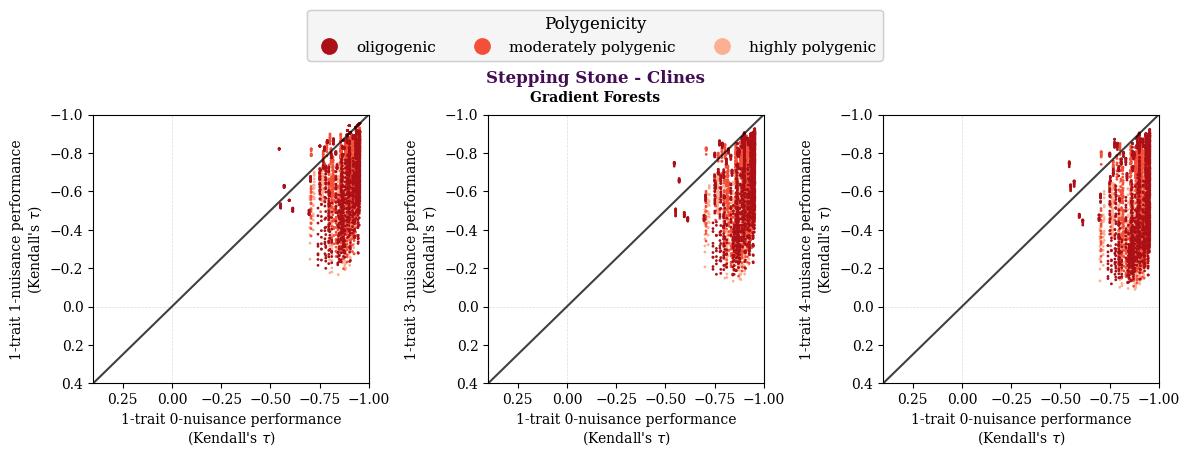

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_1-trait_true_vs_nuisance_scatter_by_glevel_SS-Mtn.pdf


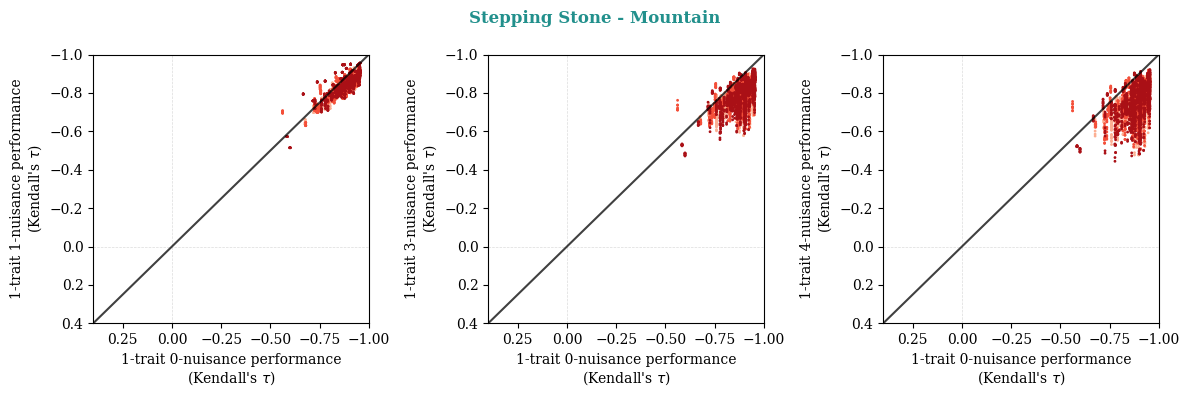

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_1-trait_true_vs_nuisance_scatter_by_glevel_Est-Clines.pdf


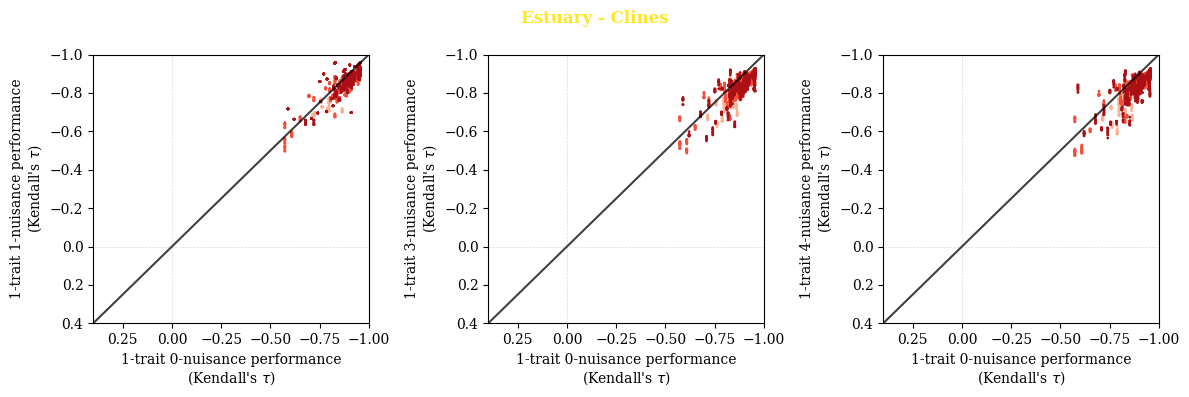

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_1-trait_true_vs_nuisance_scatter_by_popsize_SS-Clines.pdf


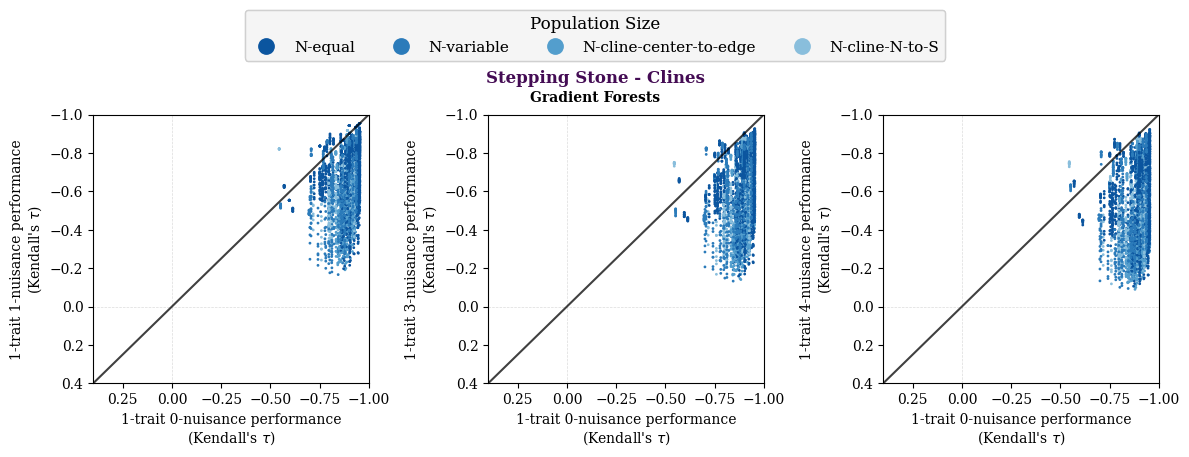

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_1-trait_true_vs_nuisance_scatter_by_popsize_SS-Mtn.pdf


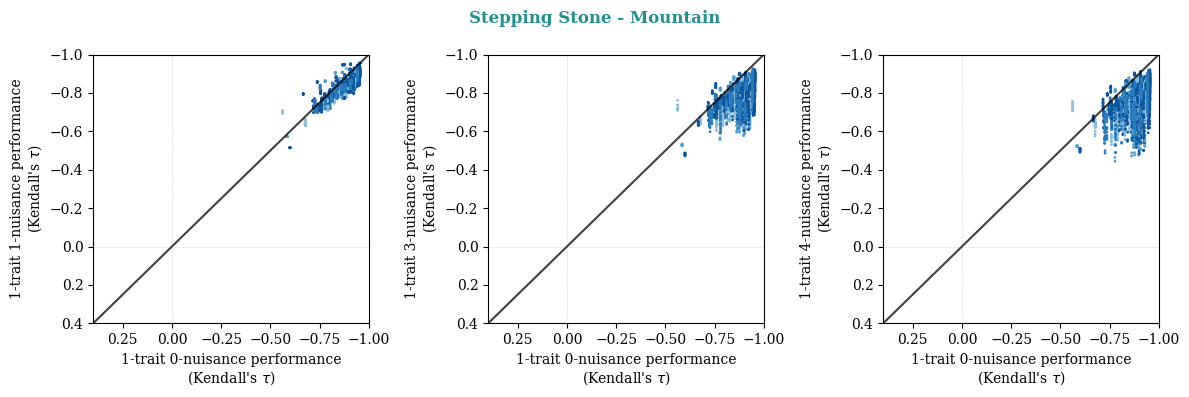

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_1-trait_true_vs_nuisance_scatter_by_popsize_Est-Clines.pdf


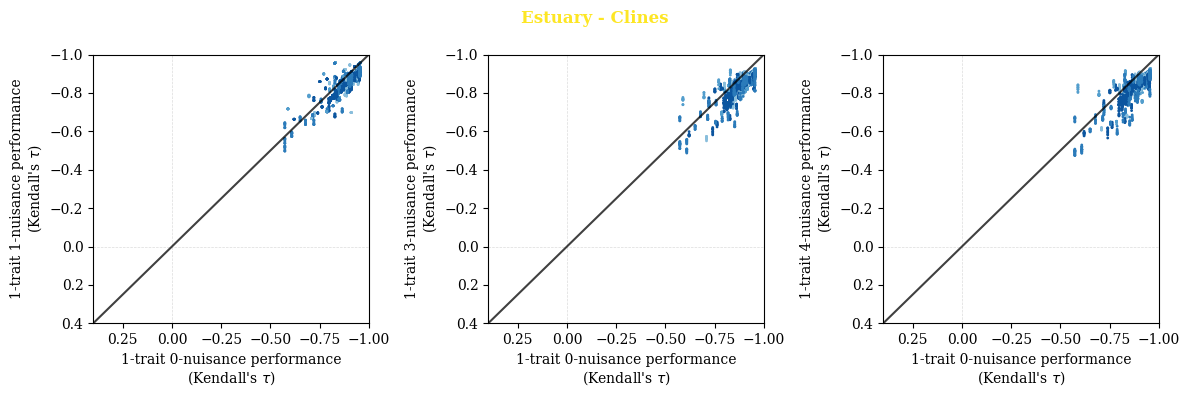

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_1-trait_true_vs_nuisance_scatter_by_migration_SS-Clines.pdf


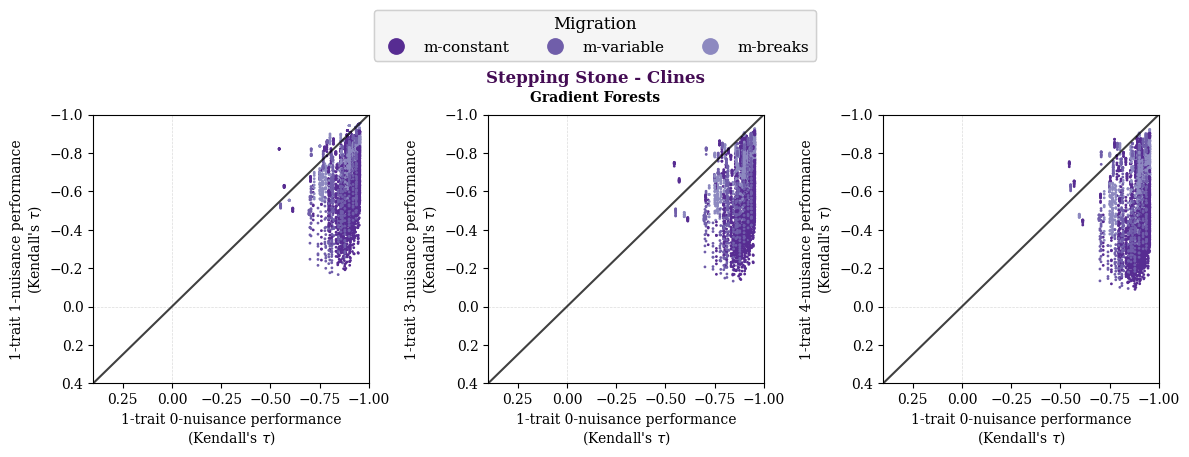

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_1-trait_true_vs_nuisance_scatter_by_migration_SS-Mtn.pdf


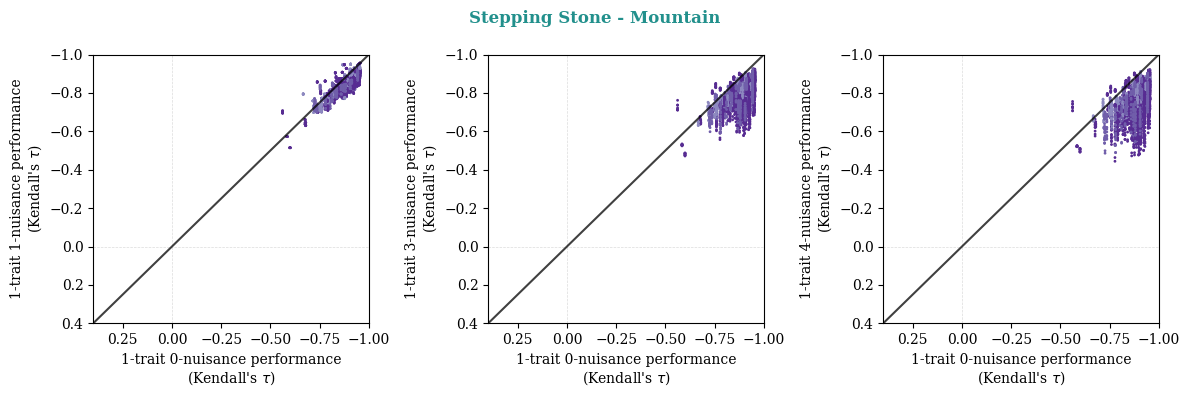

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_1-trait_true_vs_nuisance_scatter_by_migration_Est-Clines.pdf


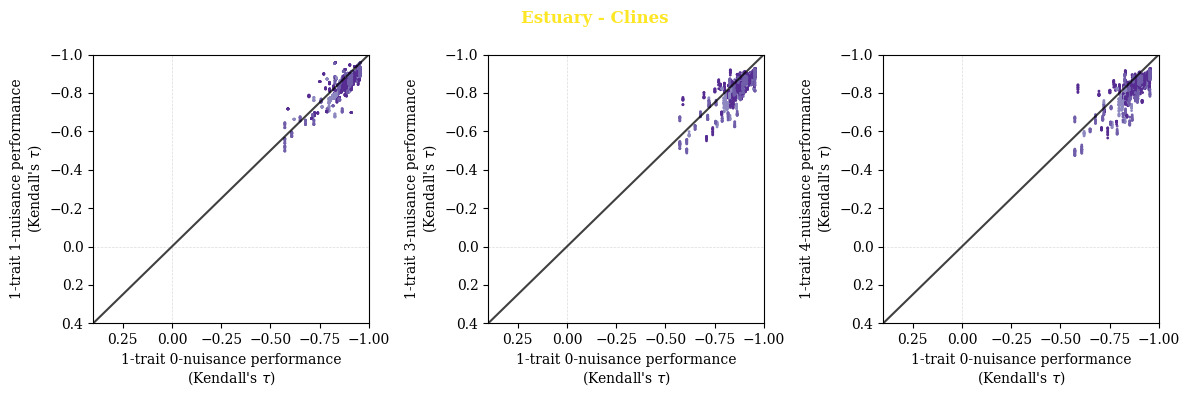

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_1-trait_true_vs_nuisance_scatter_by_marker_set_SS-Clines.pdf


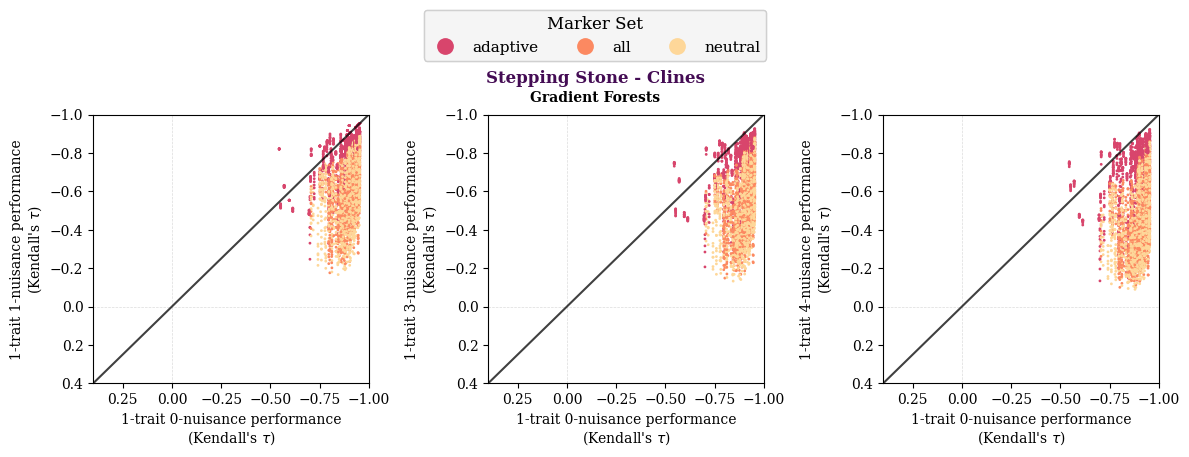

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_1-trait_true_vs_nuisance_scatter_by_marker_set_SS-Mtn.pdf


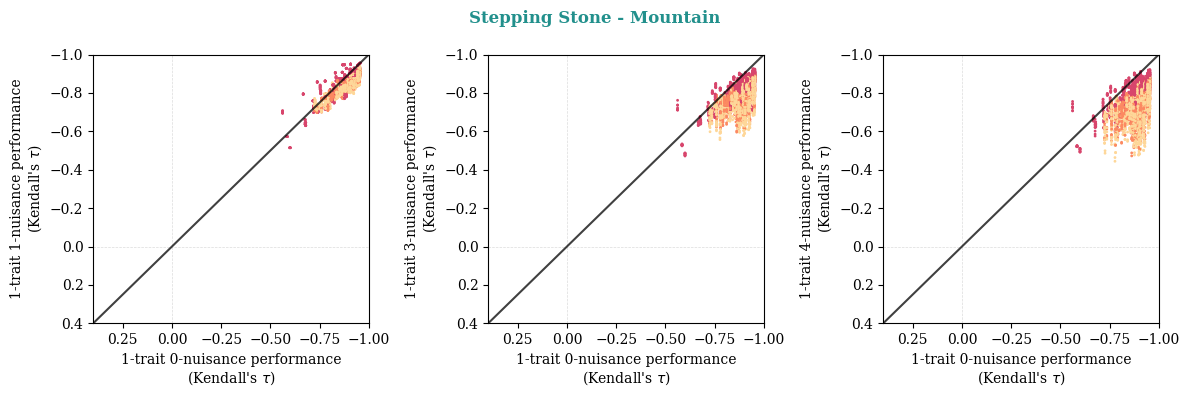

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_1-trait_true_vs_nuisance_scatter_by_marker_set_Est-Clines.pdf


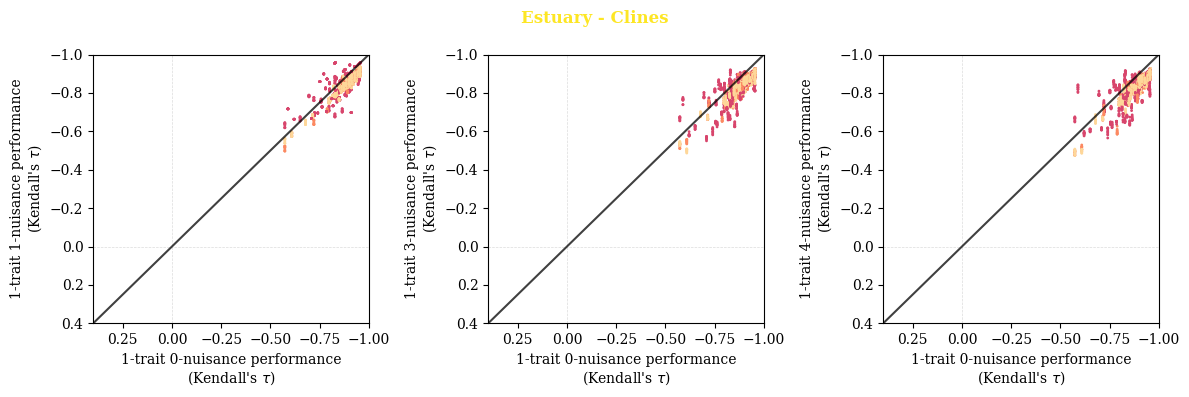

In [25]:
for hue in mvp.hue_order:
    if hue in ['landscape', 'slevel', 'noncausal_env', 'pleio', 'program']:
        continue

    plot_scatter('1-trait', color_by=hue, loc='upper center', ncol='auto', bbox_to_anchor=(0.5, 1.15))

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_true_vs_nuisance_scatter_by_glevel_SS-Clines.pdf


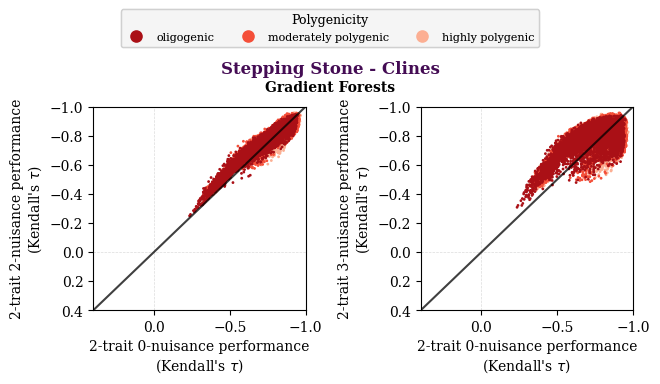

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_true_vs_nuisance_scatter_by_glevel_SS-Mtn.pdf


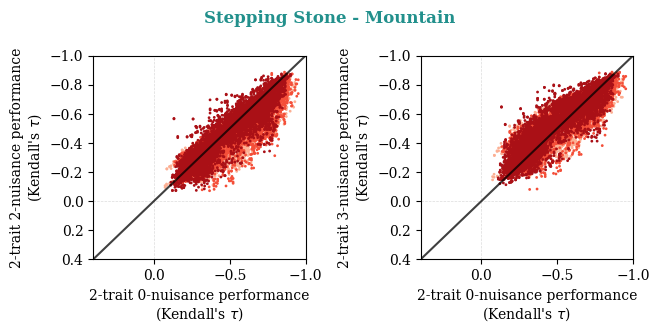

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_true_vs_nuisance_scatter_by_glevel_Est-Clines.pdf


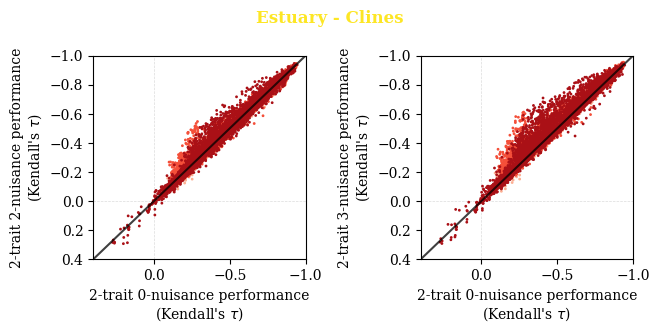

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_true_vs_nuisance_scatter_by_popsize_SS-Clines.pdf


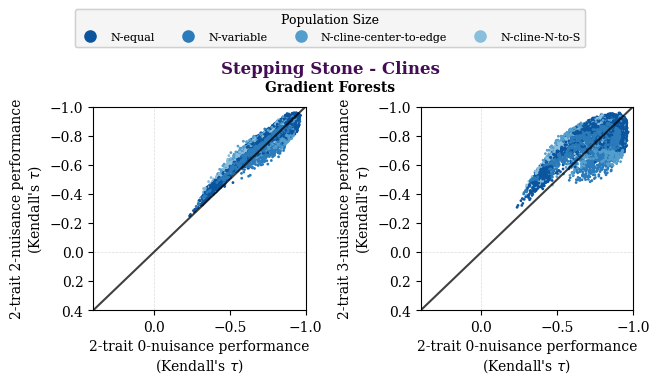

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_true_vs_nuisance_scatter_by_popsize_SS-Mtn.pdf


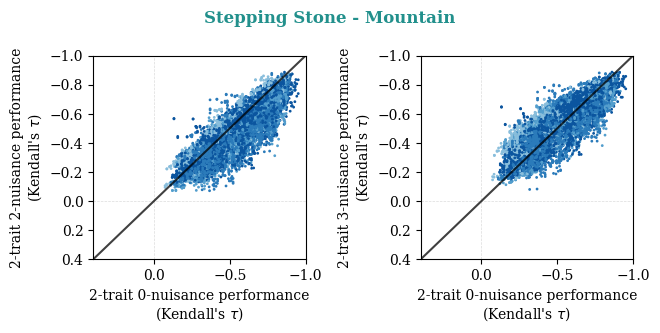

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_true_vs_nuisance_scatter_by_popsize_Est-Clines.pdf


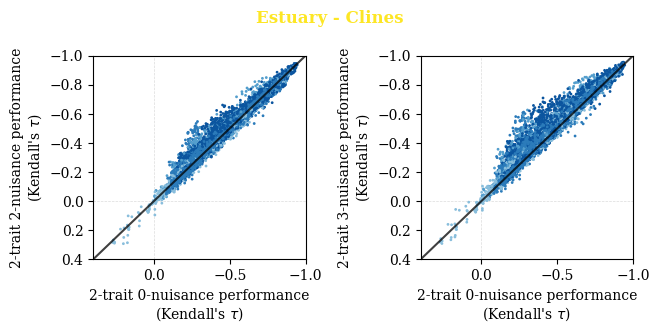

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_true_vs_nuisance_scatter_by_migration_SS-Clines.pdf


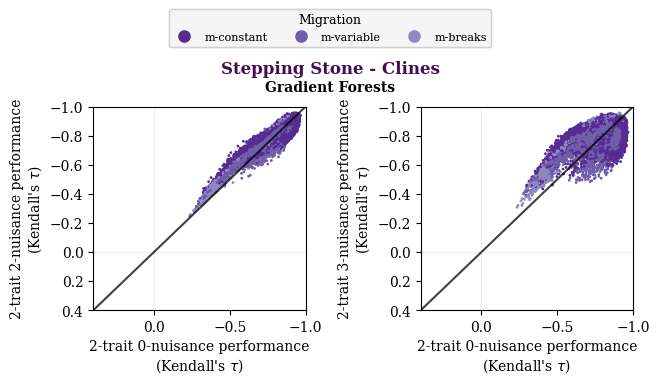

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_true_vs_nuisance_scatter_by_migration_SS-Mtn.pdf


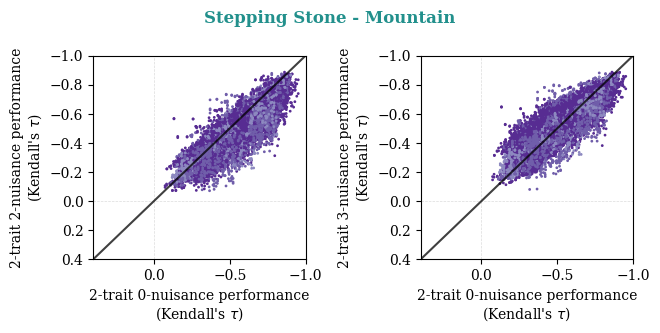

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_true_vs_nuisance_scatter_by_migration_Est-Clines.pdf


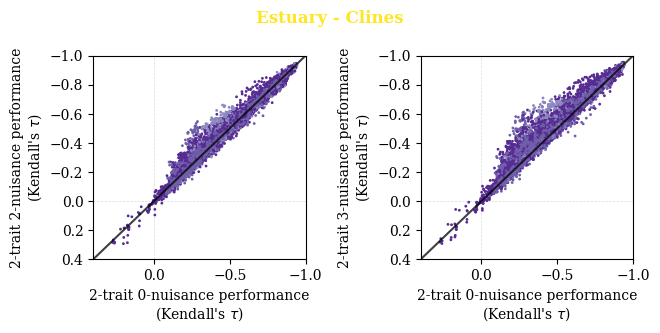

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_true_vs_nuisance_scatter_by_marker_set_SS-Clines.pdf


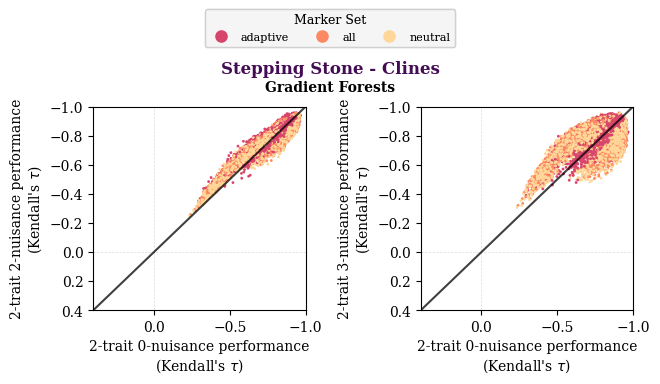

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_true_vs_nuisance_scatter_by_marker_set_SS-Mtn.pdf


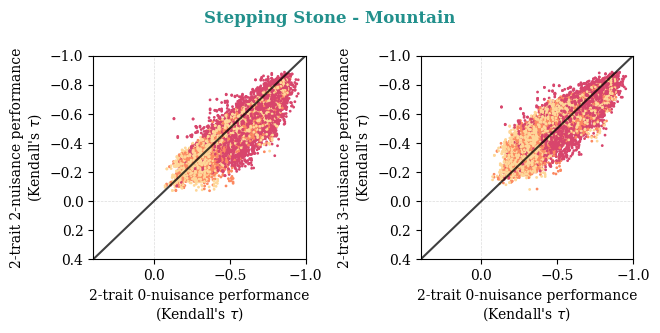

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_true_vs_nuisance_scatter_by_marker_set_Est-Clines.pdf


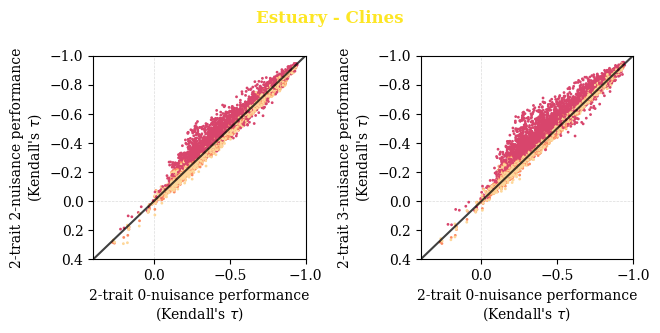

In [26]:
for hue in mvp.hue_order:
    if hue in ['landscape', 'slevel', 'noncausal_env', 'pleio', 'program']:
        continue

    plot_scatter('2-trait', color_by=hue, loc='upper center', ncol='auto', bbox_to_anchor=(0.5, 1.15))

# separate each level

In [27]:
all_scores.nuis_envs.map(mvp.factor_names).unique()

array(['1-trait 1-nuisance', '2-trait 0-nuisance', '1-trait 0-nuisance',
       '1-trait 3-nuisance', '2-trait 2-nuisance', '1-trait 4-nuisance',
       '2-trait 3-nuisance'], dtype=object)

In [28]:
def plot_scatter_all(num_traits, color_by='marker_set'):
    """Compare nuis envs to non-nuis envs, separate levels when scatter plotting.
    
    Parameters
    ----------
    ntraits : str
        of the set {'1-trait', '2-trait'}; determines what data to plot
    color_by : str
        key to mvp.hue_order; used to determine how scatter points are colored from mvp.boxplot_kwargs['palette']
    loc : str
        location of legend
    bbox_to_anchor : tuple
        fine placement of legend relative to `loc`
    ncol : [int, 'auto']
        the number of columns in the legend
    """
    
    if color_by != 'program':
        row_levels = mvp.hue_order[color_by]
    else:
        row_levels = ['rda-nocorr', 'rda-structcorr']
    
    fontsize = 13
    ticksize = 8
    rotation = None
    xoffset = -0.04
    program_y = 0.9
    if num_traits == '1-trait':
        x_level = '1-trait 1-env'
        y_levels = ['1-trait 2-envs', '1-trait 4-envs', '1-trait 5-envs']
        fontsize = 11
        if len(row_levels) == 4:
            program_y = 0.93
            figsize = (6, 6)
        elif len(row_levels) == 3:
            figsize = (6, 4)
        elif len(row_levels) == 2:
            figsize = (6, 3)
            fontsize = 11
        else:
            raise Exception(f'unexpected result: {row_levels = }')
        
    else:
        fontsize = 11
        x_level = '2-trait 2-envs'
        y_levels = ['2-trait 4-envs', '2-trait 5-envs']
        if len(row_levels) == 4:
            program_y = 0.945
            figsize=(5, 8)
        elif len(row_levels) == 3:
            program_y = 0.92
            figsize=(4, 5)
            ticksize = 7
#             rotation = 45
        elif len(row_levels) == 2:
            program_y = 0.88
            figsize=(4, 3)
            fontsize = 11
            ticksize = 7
#             rotation = 45
        else:
            raise Exception(f'unexpected result: {row_levels = }')
    
#     print(f'{figsize = }')
    
    for landscape in mvp.hue_order['landscape']:
#         print(
#             ColorText(mvp.factor_names[landscape]).custom(
#                 mvp.boxplot_kwargs['palette'][landscape]
#             ).bold()
#         )
        data = all_scores[all_scores.landscape == landscape].copy()

        fig, row_axes = plt.subplots(nrows=len(row_levels), ncols=len(y_levels),
                                     figsize=figsize, sharey=True, sharex=True)
        
        for row_level, col_axes in zip(row_levels, row_axes):
            for y_level, ax in zip(y_levels, col_axes):
                xdata = data[(data.nuis_envs == x_level) & (data[color_by] == row_level)]
                ydata = data[(data.nuis_envs == y_level) & (data[color_by] == row_level)]
                ax.scatter(
                    x=xdata['score'],
                    y=ydata['score'],
                    c=xdata[color_by].map(mvp.boxplot_kwargs['palette']),
                    s=1,
                    edgecolors=None if row_level != 'rda outliers' else 'k',
                    linewidths=None if row_level != 'rda outliers' else 0.05
                )
                
                if row_level == row_levels[-1]:
                    ax.set_xlabel(f"{mvp.factor_names[x_level]}")

                _ylabel = mvp.factor_names[y_level].replace(' ', '\n')
                ax.set_ylabel(f"{_ylabel}")

                lims = [
                    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
                    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
                ]
                
                ax.plot(lims, lims, 'k-', alpha=0.75, zorder=5)

                ax.set_xlim(lims)
                ax.set_ylim(lims)

                # set ticks every 0.25
                ticks = [x/100 for x in range(math.floor(min(lims)) * 100,
                                              math.ceil(max(lims)) * 100,
                                              25)
                         if x/100 > lims[0]-0.1 and 
                         x/100 < lims[1]+0.1
                        ]

                ax.xaxis.set_ticks(ticks)
                ax.yaxis.set_ticks(ticks)
                ax.set_xticklabels(['{:.2f}'.format(tick) for tick in ticks], family='serif',
                                   fontsize=ticksize, rotation=rotation)
                ax.set_yticklabels(['{:.2f}'.format(tick) for tick in ticks], family='serif',
                                   fontsize=ticksize)

                ax.invert_xaxis()
                ax.invert_yaxis()

                ax.axhline(0, linestyle='--', color='gainsboro', linewidth=0.5, zorder=0)
                ax.axvline(0, linestyle='--', color='gainsboro', linewidth=0.5, zorder=0)
        
        fig.suptitle(mvp.factor_names[landscape], family='serif',
                     color=mvp.boxplot_kwargs['palette'][landscape], weight='bold')
        
        fig.tight_layout()
        
        # add ylabel
        fig.text(xoffset, 0.515,
                 "Performance with Nuisance Environments\n(Kendall's $\\tau$)",
                 fontsize=fontsize, rotation='vertical', va='center', family='serif', multialignment='center')
        # add xlabel
        fig.text(0.515, -0.06, "Performance without Nuisance Environments\n(Kendall's $\\tau$)",
                 fontsize=fontsize, ha='center', family='serif')

        # this time pass `fig` to add_legend
        if landscape == 'SS-Clines':
            mvp.add_legend(fig, fontsize=9, color_by=color_by, loc='lower center',
                           bbox_to_anchor=(0.515, 1.0),
                           ncol=len(row_levels), only_rda=True)

        fig.text(0.5, program_y, 'Gradient Forests', weight='bold', ha='center')
        
        save_pdf(f'{figdir}/GF_{ntraits}_separated_true_vs_nuisance_scatter_by_{color_by}_{landscape}.pdf')
        
        plt.show()

    pass

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_separated_true_vs_nuisance_scatter_by_glevel_SS-Clines.pdf


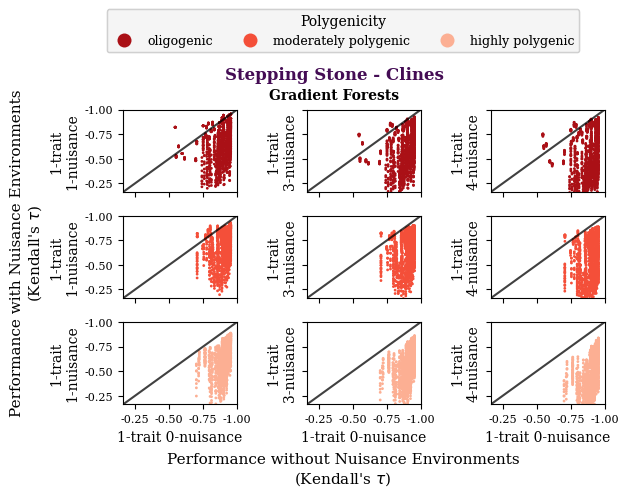

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_separated_true_vs_nuisance_scatter_by_glevel_SS-Mtn.pdf


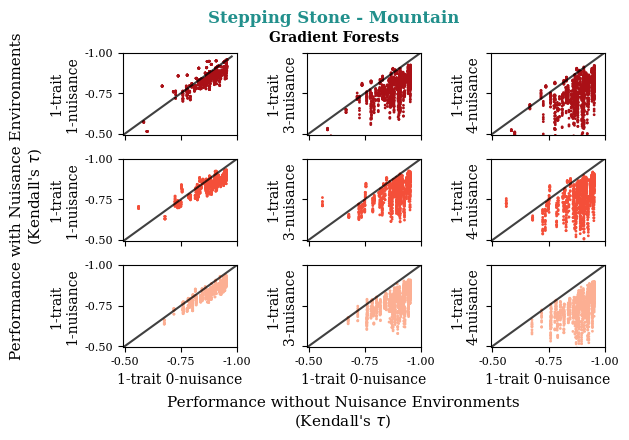

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_separated_true_vs_nuisance_scatter_by_glevel_Est-Clines.pdf


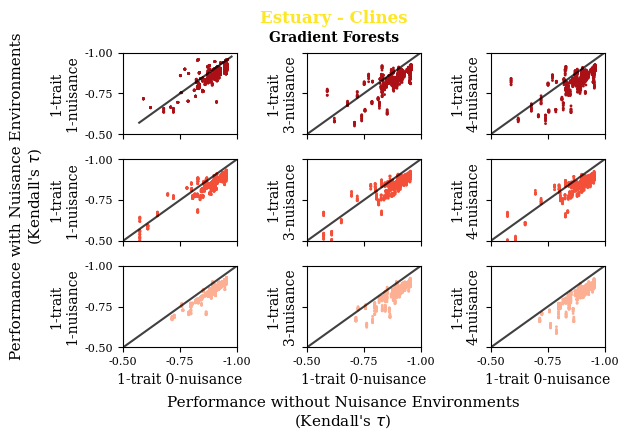

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_separated_true_vs_nuisance_scatter_by_popsize_SS-Clines.pdf


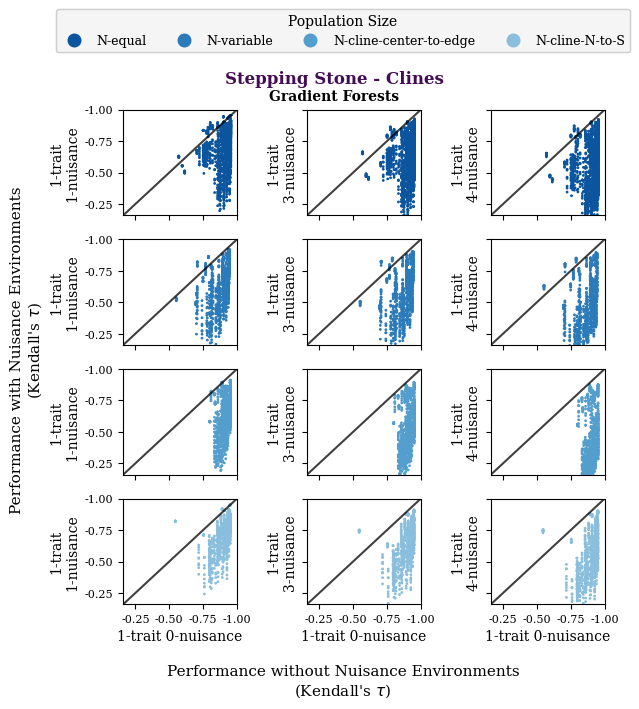

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_separated_true_vs_nuisance_scatter_by_popsize_SS-Mtn.pdf


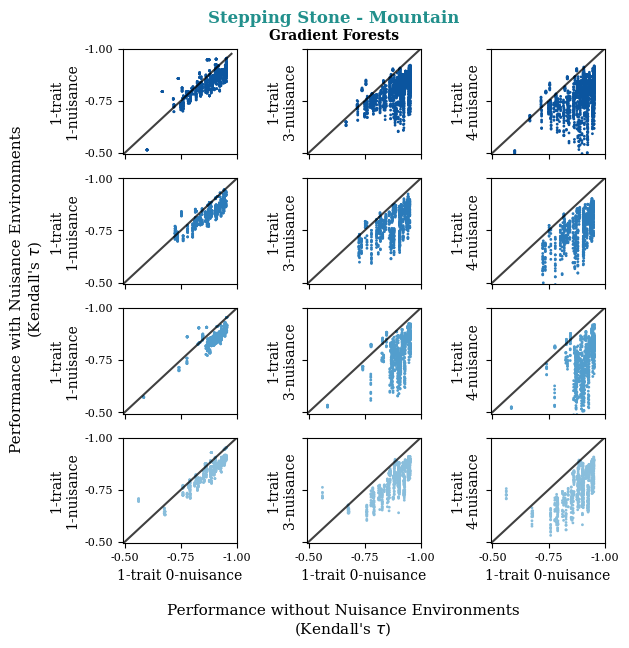

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_separated_true_vs_nuisance_scatter_by_popsize_Est-Clines.pdf


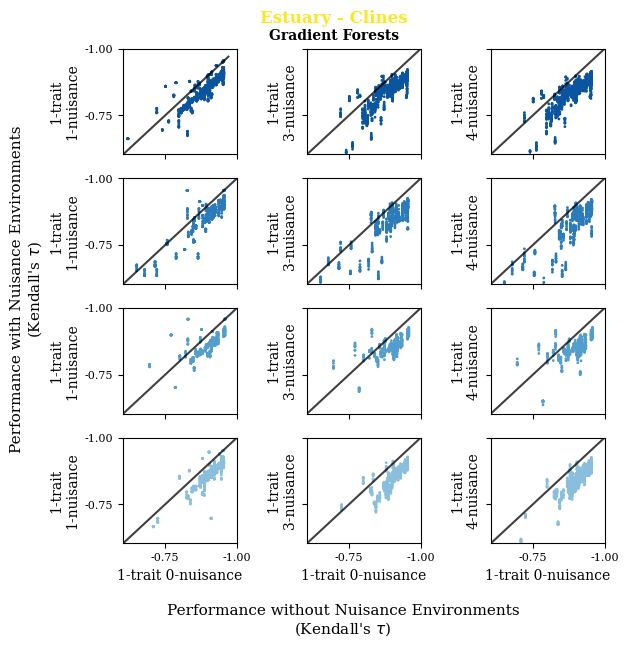

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_separated_true_vs_nuisance_scatter_by_migration_SS-Clines.pdf


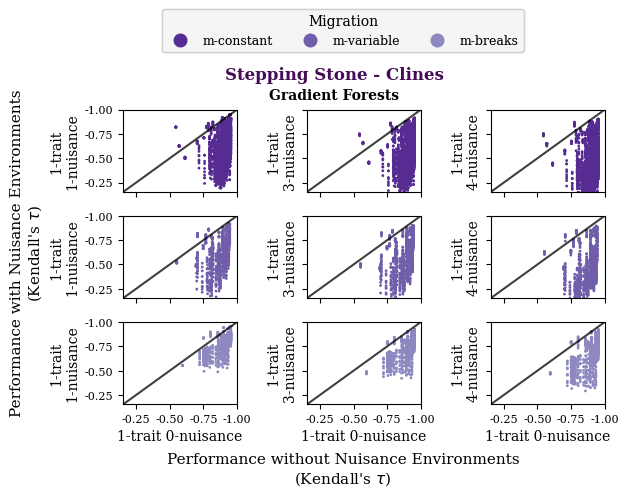

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_separated_true_vs_nuisance_scatter_by_migration_SS-Mtn.pdf


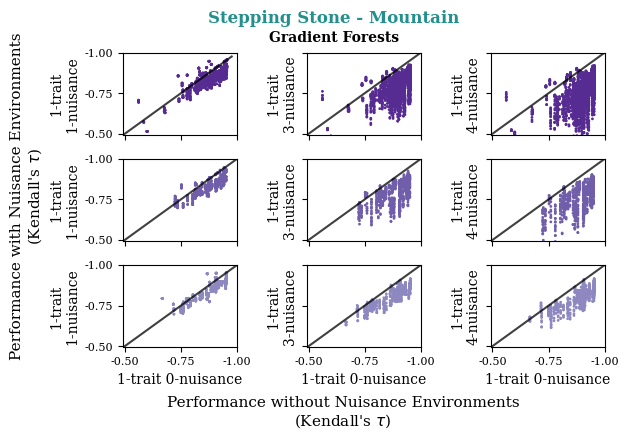

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_separated_true_vs_nuisance_scatter_by_migration_Est-Clines.pdf


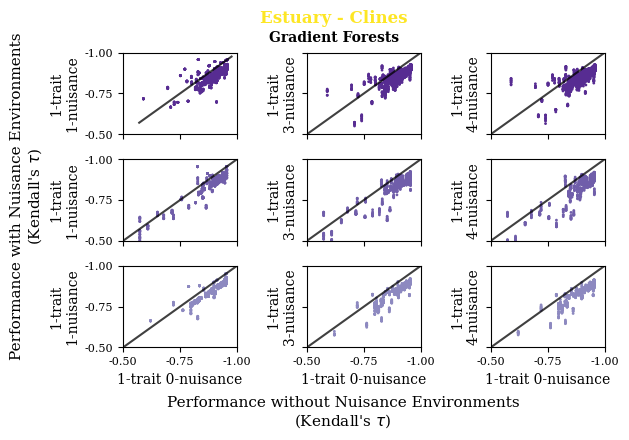

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_separated_true_vs_nuisance_scatter_by_marker_set_SS-Clines.pdf


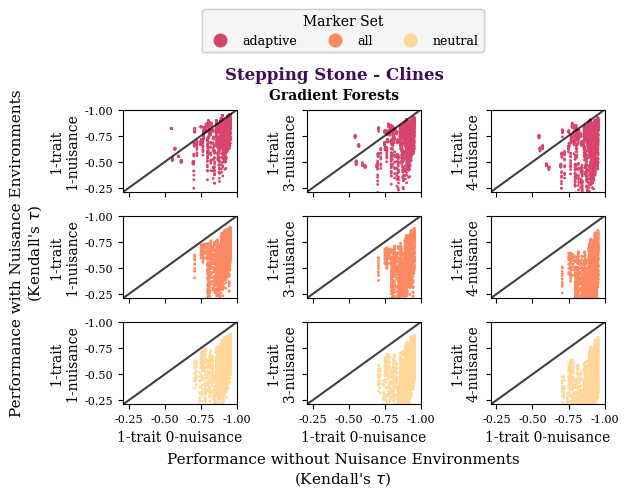

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_separated_true_vs_nuisance_scatter_by_marker_set_SS-Mtn.pdf


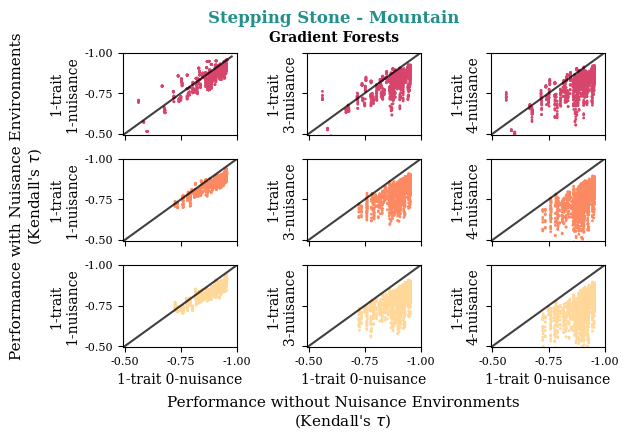

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_separated_true_vs_nuisance_scatter_by_marker_set_Est-Clines.pdf


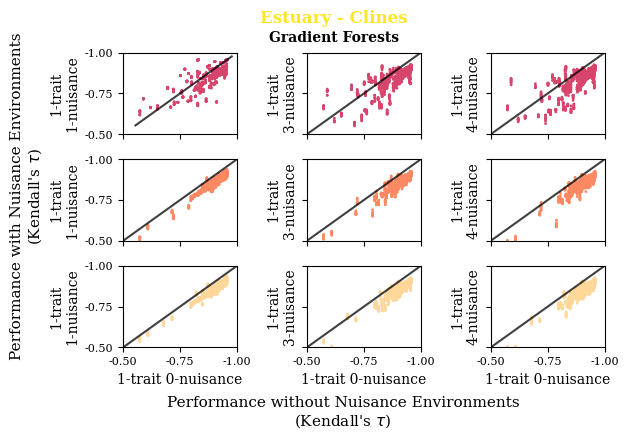

In [29]:
for hue in mvp.hue_order:
    if hue in ['landscape', 'slevel', 'noncausal_env', 'pleio', 'program']:
        continue
        
    plot_scatter_all('1-trait', color_by=hue)

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_separated_true_vs_nuisance_scatter_by_glevel_SS-Clines.pdf


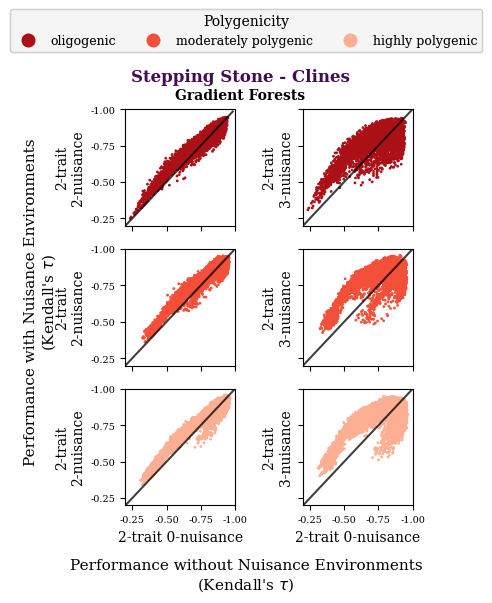

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_separated_true_vs_nuisance_scatter_by_glevel_SS-Mtn.pdf


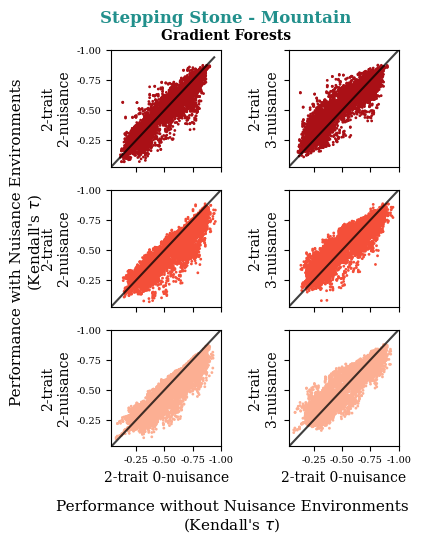

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_separated_true_vs_nuisance_scatter_by_glevel_Est-Clines.pdf


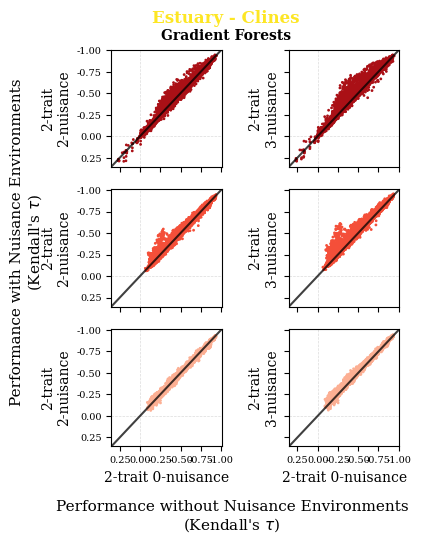

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_separated_true_vs_nuisance_scatter_by_pleio_SS-Clines.pdf


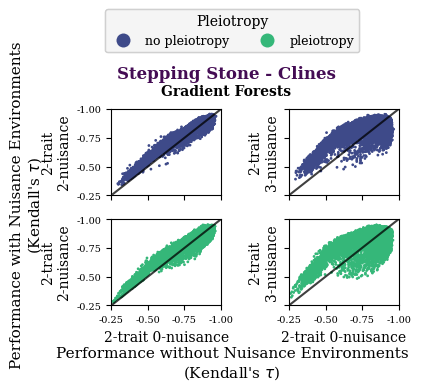

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_separated_true_vs_nuisance_scatter_by_pleio_SS-Mtn.pdf


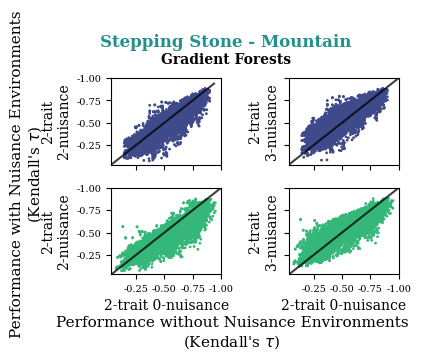

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_separated_true_vs_nuisance_scatter_by_pleio_Est-Clines.pdf


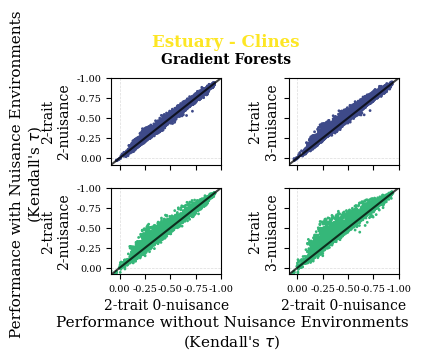

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_separated_true_vs_nuisance_scatter_by_slevel_SS-Clines.pdf


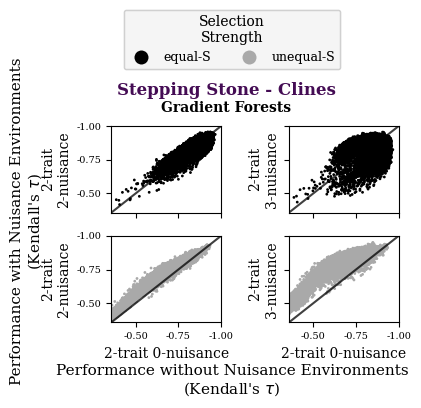

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_separated_true_vs_nuisance_scatter_by_slevel_SS-Mtn.pdf


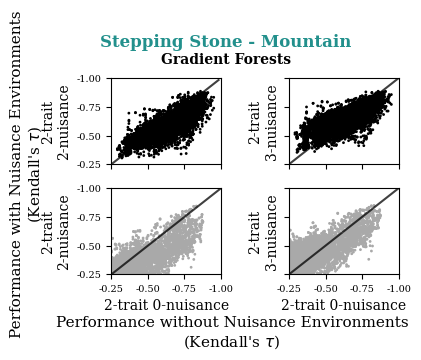

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_separated_true_vs_nuisance_scatter_by_slevel_Est-Clines.pdf


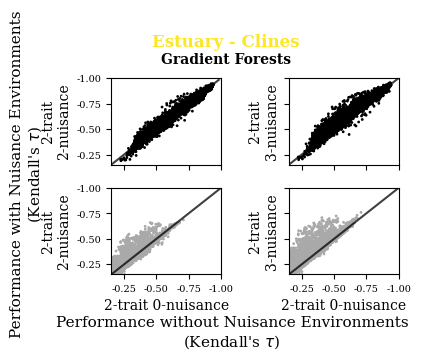

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_separated_true_vs_nuisance_scatter_by_popsize_SS-Clines.pdf


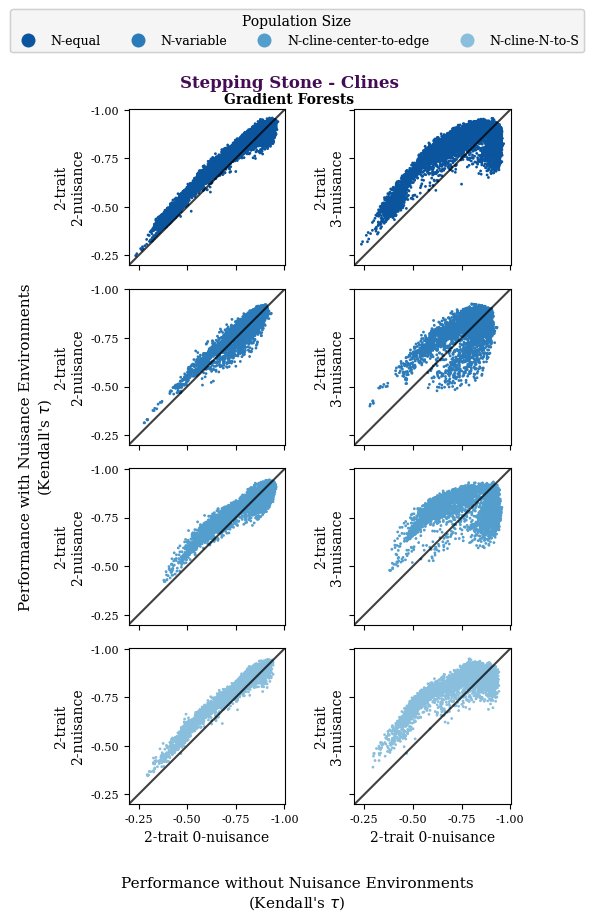

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_separated_true_vs_nuisance_scatter_by_popsize_SS-Mtn.pdf


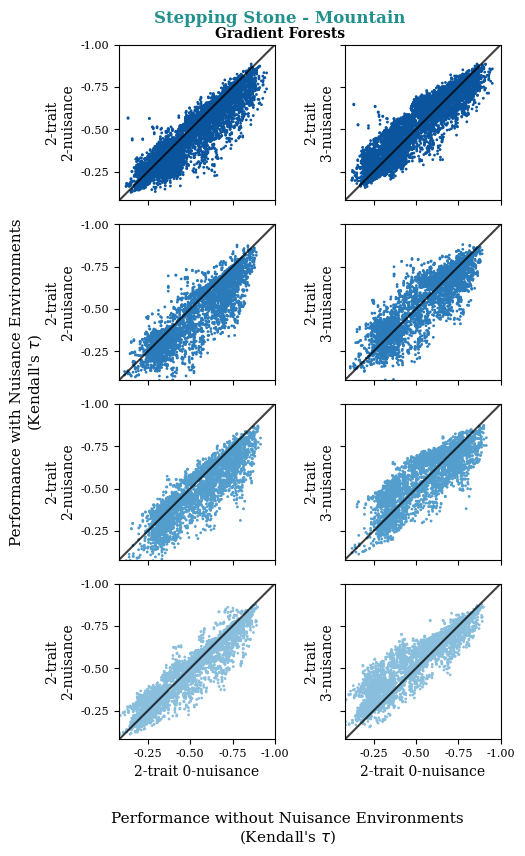

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_separated_true_vs_nuisance_scatter_by_popsize_Est-Clines.pdf


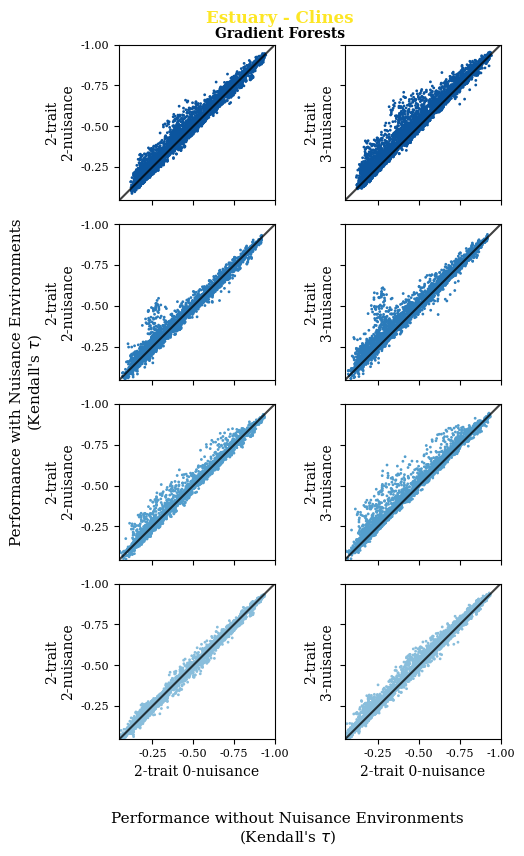

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_separated_true_vs_nuisance_scatter_by_migration_SS-Clines.pdf


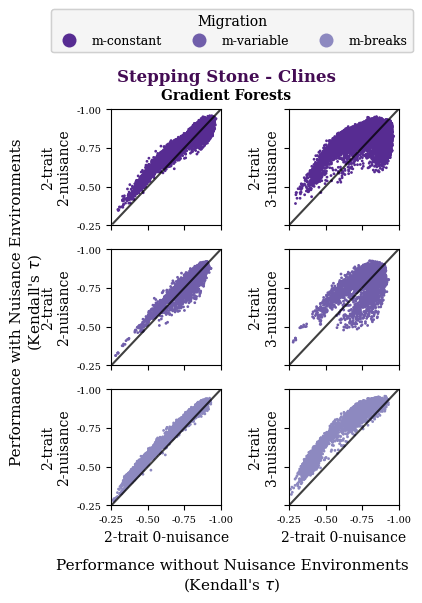

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_separated_true_vs_nuisance_scatter_by_migration_SS-Mtn.pdf


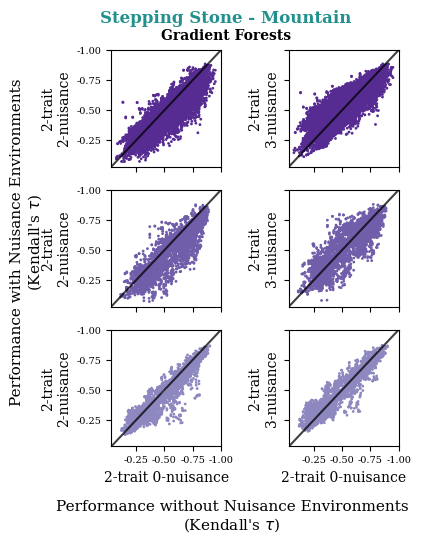

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_separated_true_vs_nuisance_scatter_by_migration_Est-Clines.pdf


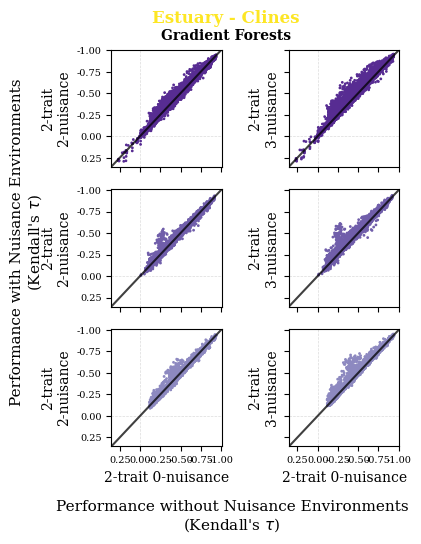

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_separated_true_vs_nuisance_scatter_by_marker_set_SS-Clines.pdf


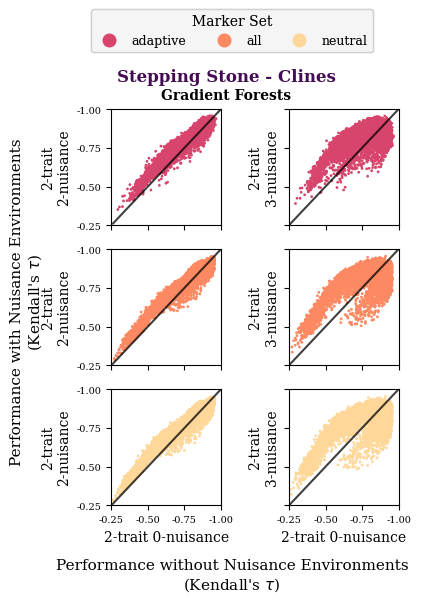

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_separated_true_vs_nuisance_scatter_by_marker_set_SS-Mtn.pdf


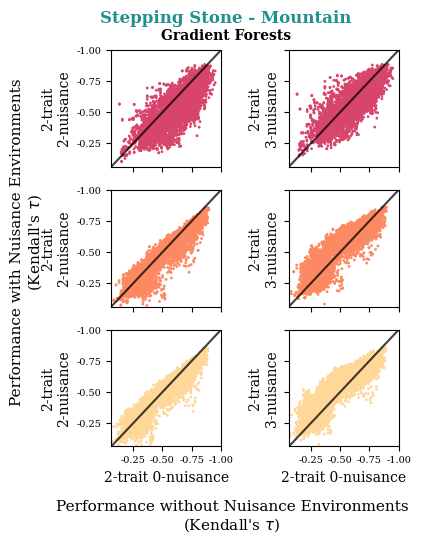

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_separated_true_vs_nuisance_scatter_by_marker_set_Est-Clines.pdf


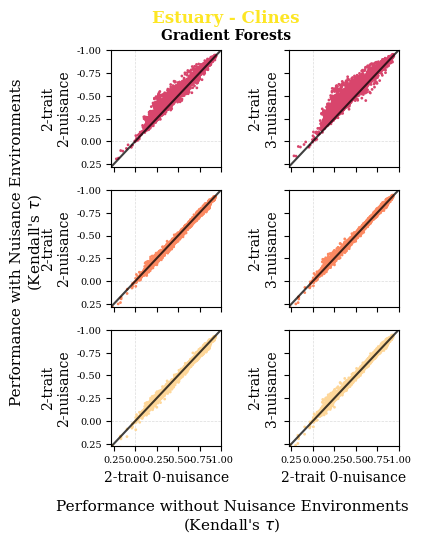

In [30]:
for hue in mvp.hue_order:
    if hue in ['landscape', 'noncausal_env', 'program']:
        continue
        
    plot_scatter_all('2-trait', color_by=hue)

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_separated_true_vs_nuisance_scatter_by_popsize_SS-Clines.pdf


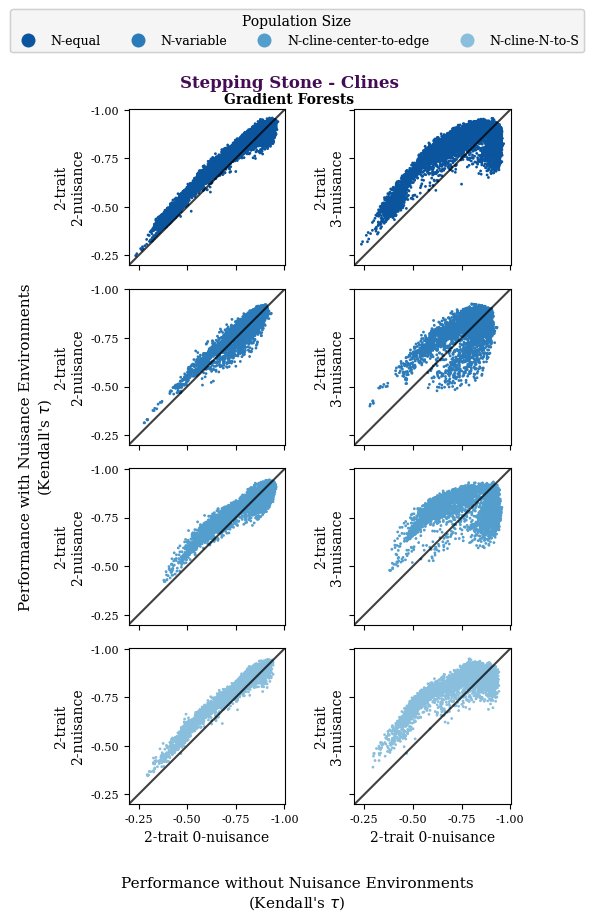

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_separated_true_vs_nuisance_scatter_by_popsize_SS-Mtn.pdf


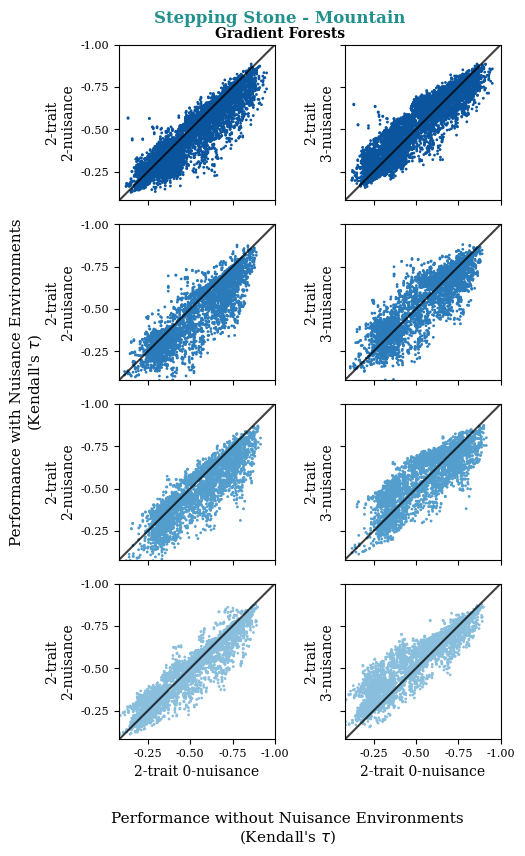

Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/07_experiments/02_nuisance_envs/05_visualize_nuisance_GF/GF_2-trait_separated_true_vs_nuisance_scatter_by_popsize_Est-Clines.pdf


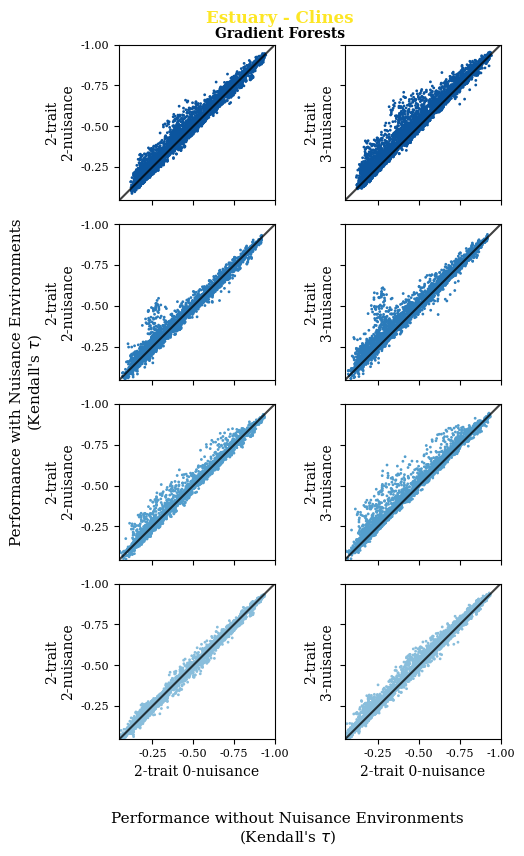

In [31]:
plot_scatter_all('2-trait', color_by='popsize')

In [32]:
formatclock(dt.now() - t0)

'0-00:02:44'